In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('earnings_train.csv')
df


,DISTRICT_TYPE,DISTRICT_NAME,DISTRICT_CODE,ACADEMIC_YEAR,DEMO_CATEGORY,STUDENT_POPULATION,AWARD_CATEGORY,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
0,School District,Duarte Unified,1964469.0,2018-2019,Race,None Reported,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
1,School District,Coronado Unified,3768031.0,2018-2019,Race,None Reported,Associate Degree,0.0,0.0,0.0,0.0
2,School District,Gilroy Unified,4369484.0,2018-2019,Race,Black or African American,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
3,School District,Pleasant Valley,5672553.0,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Community College Certificate,0.0,0.0,0.0,0.0
4,Legislative District,Senate District 15,NaN,2018-2019,Race,American Indian or Alaska Native,Community College Certificate,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20700,School District,Armona Union Elementary,1663875.0,2018-2019,Race,American Indian or Alaska Native,Associate Degree,0.0,0.0,0.0,0.0
20701,School District,Taft Union High,1563818.0,2018-2019,Race,White,Community College Certificate,0.0,0.0,0.0,0.0
20702,School District,Bassett Unified,1964295.0,2018-2019,Foster Status,Foster Youth,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
20703,School District,SBE - John Henry High,777354.0,2018-2019,Gender,Male,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0


### 1. Data Exploration

#### Data Quality

In [53]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

print("Data Types:")
print(df.dtypes)
print("\nMissing Data:")
print(df.isnull().sum())
print("\nMissing Data Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))



Data Types:
DISTRICT_TYPE          object
DISTRICT_NAME          object
DISTRICT_CODE         float64
ACADEMIC_YEAR          object
DEMO_CATEGORY          object
STUDENT_POPULATION     object
AWARD_CATEGORY         object
WAGE_YEAR1            float64
WAGE_YEAR2            float64
WAGE_YEAR3            float64
WAGE_YEAR4            float64
dtype: object

Missing Data:
DISTRICT_TYPE            0
DISTRICT_NAME            0
DISTRICT_CODE         2745
ACADEMIC_YEAR            0
DEMO_CATEGORY            0
STUDENT_POPULATION       0
AWARD_CATEGORY           0
WAGE_YEAR1               0
WAGE_YEAR2               0
WAGE_YEAR3               0
WAGE_YEAR4               0
dtype: int64

Missing Data Percentage:
DISTRICT_TYPE          0.00
DISTRICT_NAME          0.00
DISTRICT_CODE         13.26
ACADEMIC_YEAR          0.00
DEMO_CATEGORY          0.00
STUDENT_POPULATION     0.00
AWARD_CATEGORY         0.00
WAGE_YEAR1             0.00
WAGE_YEAR2             0.00
WAGE_YEAR3             0.00
WAGE_YEAR4   

Visualization 1

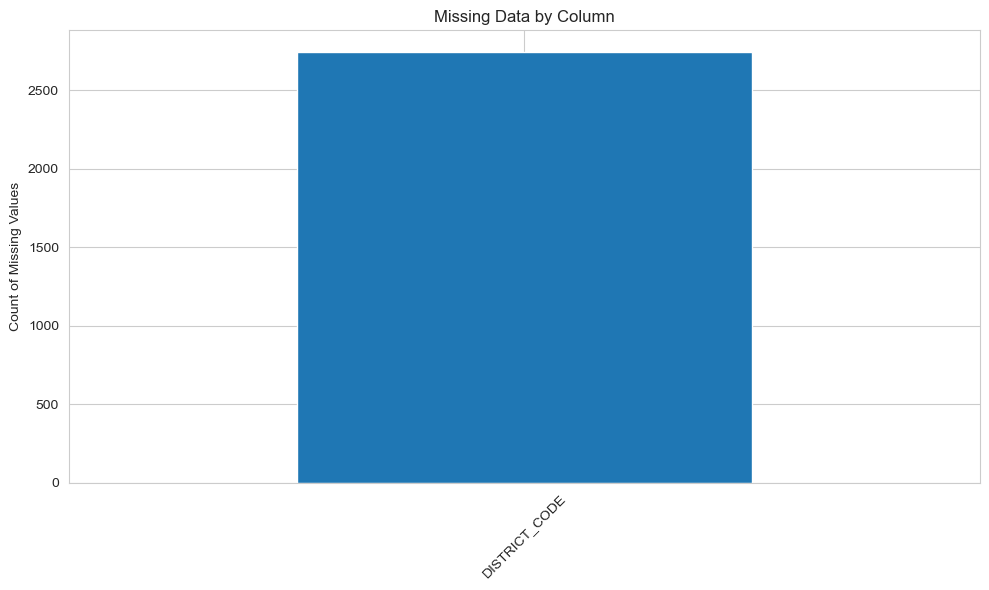

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
if len(missing_data) > 0:
    missing_data.plot(kind='bar', ax=ax)
    ax.set_title('Missing Data by Column')
    ax.set_ylabel('Count of Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing data found!")


#### Range

##### Categorial Colomn

In [55]:
catagorical_columns = categorical_cols = ['DISTRICT_TYPE', 'DISTRICT_NAME', 'ACADEMIC_YEAR', 'DEMO_CATEGORY', 
                    'STUDENT_POPULATION', 'AWARD_CATEGORY']

#Unique values
for col in catagorical_columns:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"\n{col}:")
        print(f"  Number of unique values: {unique_count}")
        if unique_count <= 20:
            print(f"  Unique values: {df[col].unique()}")
        else:
            print(f"  First 20 unique values: {df[col].unique()[:20]}")






DISTRICT_TYPE:
  Number of unique values: 3
  Unique values: ['School District' 'Legislative District' 'All']

DISTRICT_NAME:
  Number of unique values: 692
  First 20 unique values: ['Duarte Unified' 'Coronado Unified' 'Gilroy Unified' 'Pleasant Valley'
 'Senate District 15' 'Adelanto Elementary' 'Assembly District 56'
 'Klamath-Trinity Joint Unified' 'Modoc Joint Unified'
 'Healdsburg Unified' 'Kings County Office of Education'
 'Assembly District 11' 'Liberty Union High' 'Azusa Unified'
 'Benicia Unified' 'Konocti Unified' 'SBE - Vista Springs Charter'
 'Stone Corral Elementary' 'Santa Cruz County Office of Education'
 'Del Norte County Unified']

ACADEMIC_YEAR:
  Number of unique values: 1
  Unique values: ['2018-2019']

DEMO_CATEGORY:
  Number of unique values: 5
  Unique values: ['Race' 'Homeless Status' 'All' 'Foster Status' 'Gender']

STUDENT_POPULATION:
  Number of unique values: 15
  Unique values: ['None Reported' 'Black or African American'
 'Did Not Experience Homelessnes

Visualization 2

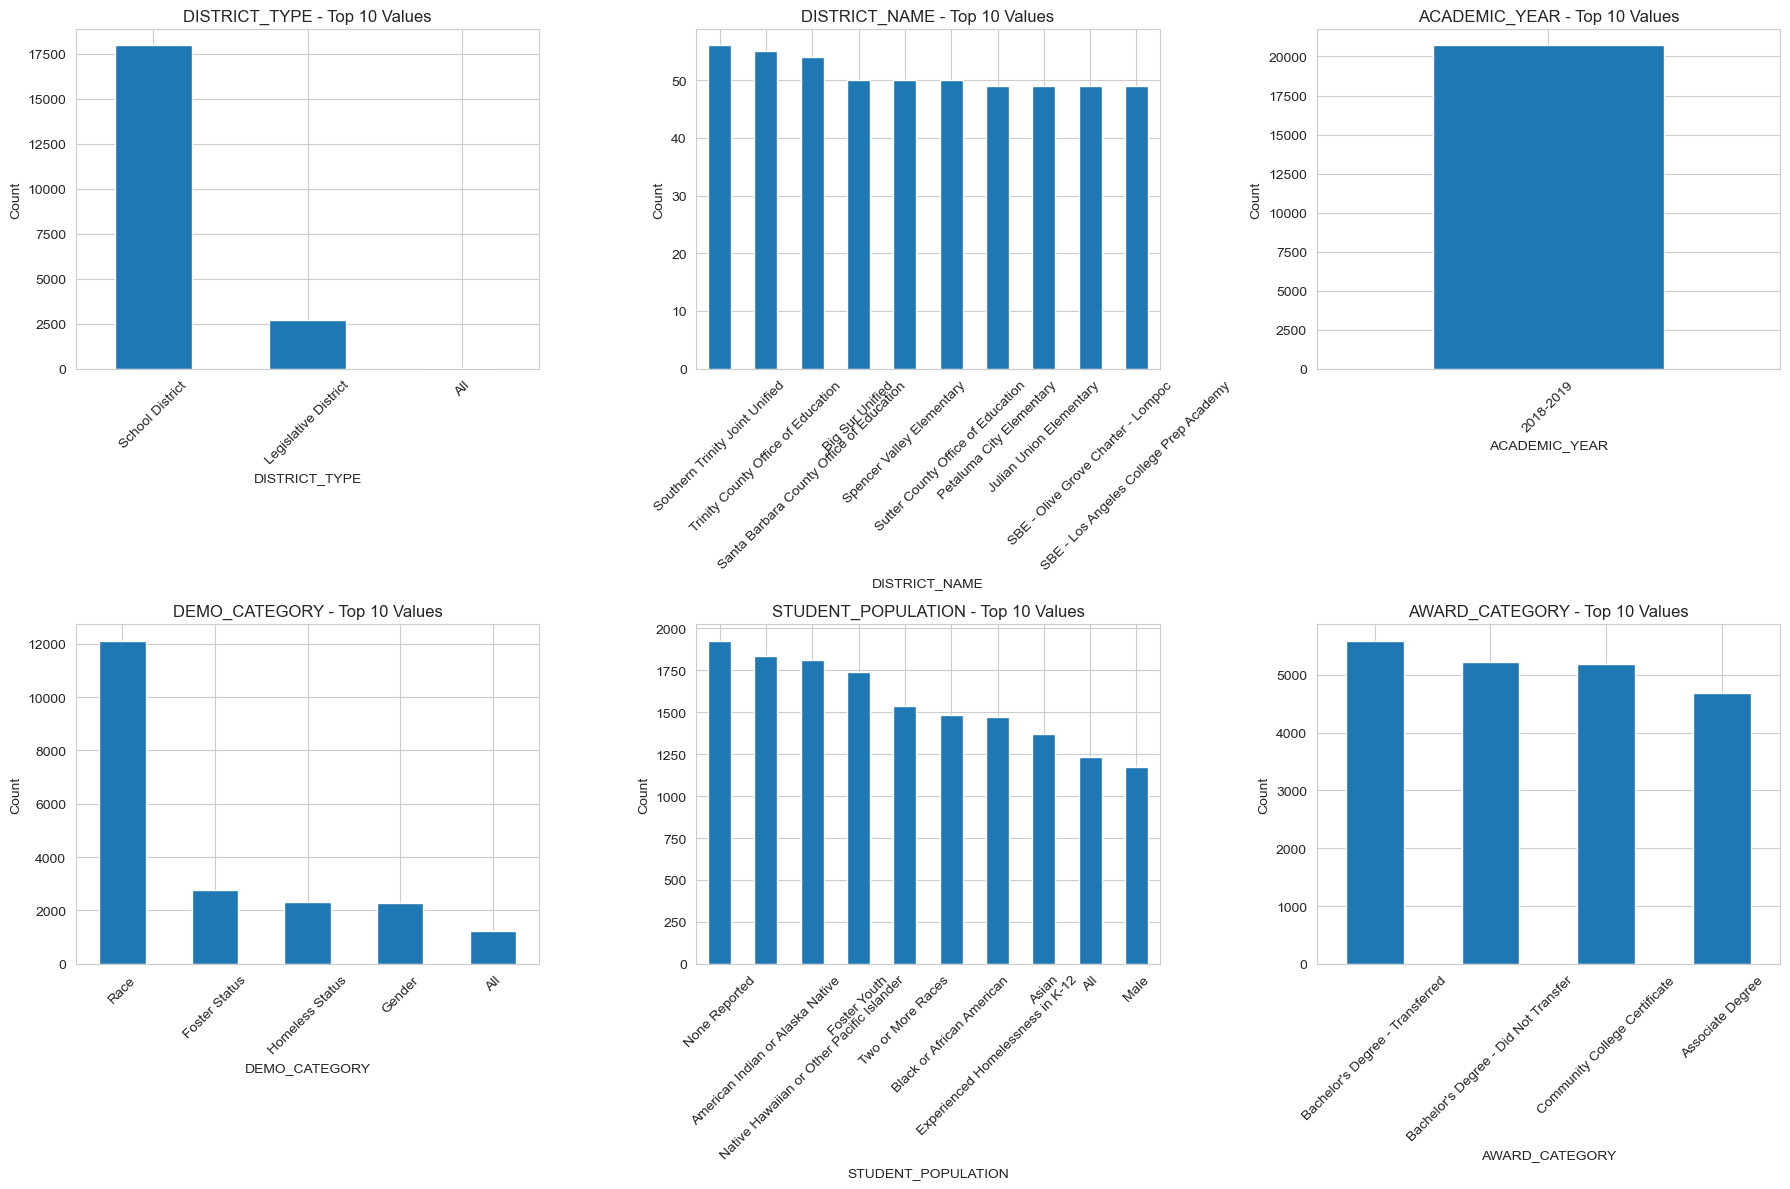

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols[:6]):
    if col in df.columns:
        value_counts = df[col].value_counts().head(10)
        value_counts.plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'{col} - Top 10 Values')
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Numeric Columns

In [57]:

#Numerical columns
numeric_cols = ['DISTRICT_CODE', 'WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']

for col in numeric_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Min: {df[col].min()}")
        print(f"  Max: {df[col].max()}")
        print(f"  Mean: {df[col].mean()}")
        print(f"  Median: {df[col].median()}")
        print(f"  Standard Deviation: {df[col].std()}")

#Check normal distribution
for col in numeric_cols:
    if col in df.columns:
        if 'WAGE' in col:
            data = df[df[col] > 0][col]
        else:
            data = df[col].dropna()
        
        if len(data) > 3:  # Need at least 3 samples for test
            stat, p_value = stats.shapiro(data.sample(min(5000, len(data))))
            is_normal = "Yes" if p_value > 0.05 else "No"
            print(f"{col}: p-value = {p_value:.4f}, Normally distributed: {is_normal}")




DISTRICT_CODE:
  Min: 110017.0
  Max: 5872769.0
  Mean: 3041330.7105790647
  Median: 3166852.0
  Standard Deviation: 1583286.1984886068

WAGE_YEAR1:
  Min: 0.0
  Max: 97993.0
  Mean: 4476.106834098044
  Median: 0.0
  Standard Deviation: 11944.502346483778

WAGE_YEAR2:
  Min: 0.0
  Max: 132847.0
  Mean: 6075.533252837479
  Median: 0.0
  Standard Deviation: 16140.916902879779

WAGE_YEAR3:
  Min: 0.0
  Max: 146728.0
  Mean: 7310.831634870804
  Median: 0.0
  Standard Deviation: 19158.203471238325

WAGE_YEAR4:
  Min: 0.0
  Max: 153910.0
  Mean: 8530.890412943734
  Median: 0.0
  Standard Deviation: 22106.663178871004
DISTRICT_CODE: p-value = 0.0000, Normally distributed: No
WAGE_YEAR1: p-value = 0.0000, Normally distributed: No
WAGE_YEAR2: p-value = 0.0000, Normally distributed: No
WAGE_YEAR3: p-value = 0.0000, Normally distributed: No
WAGE_YEAR4: p-value = 0.0000, Normally distributed: No


Visualization 3

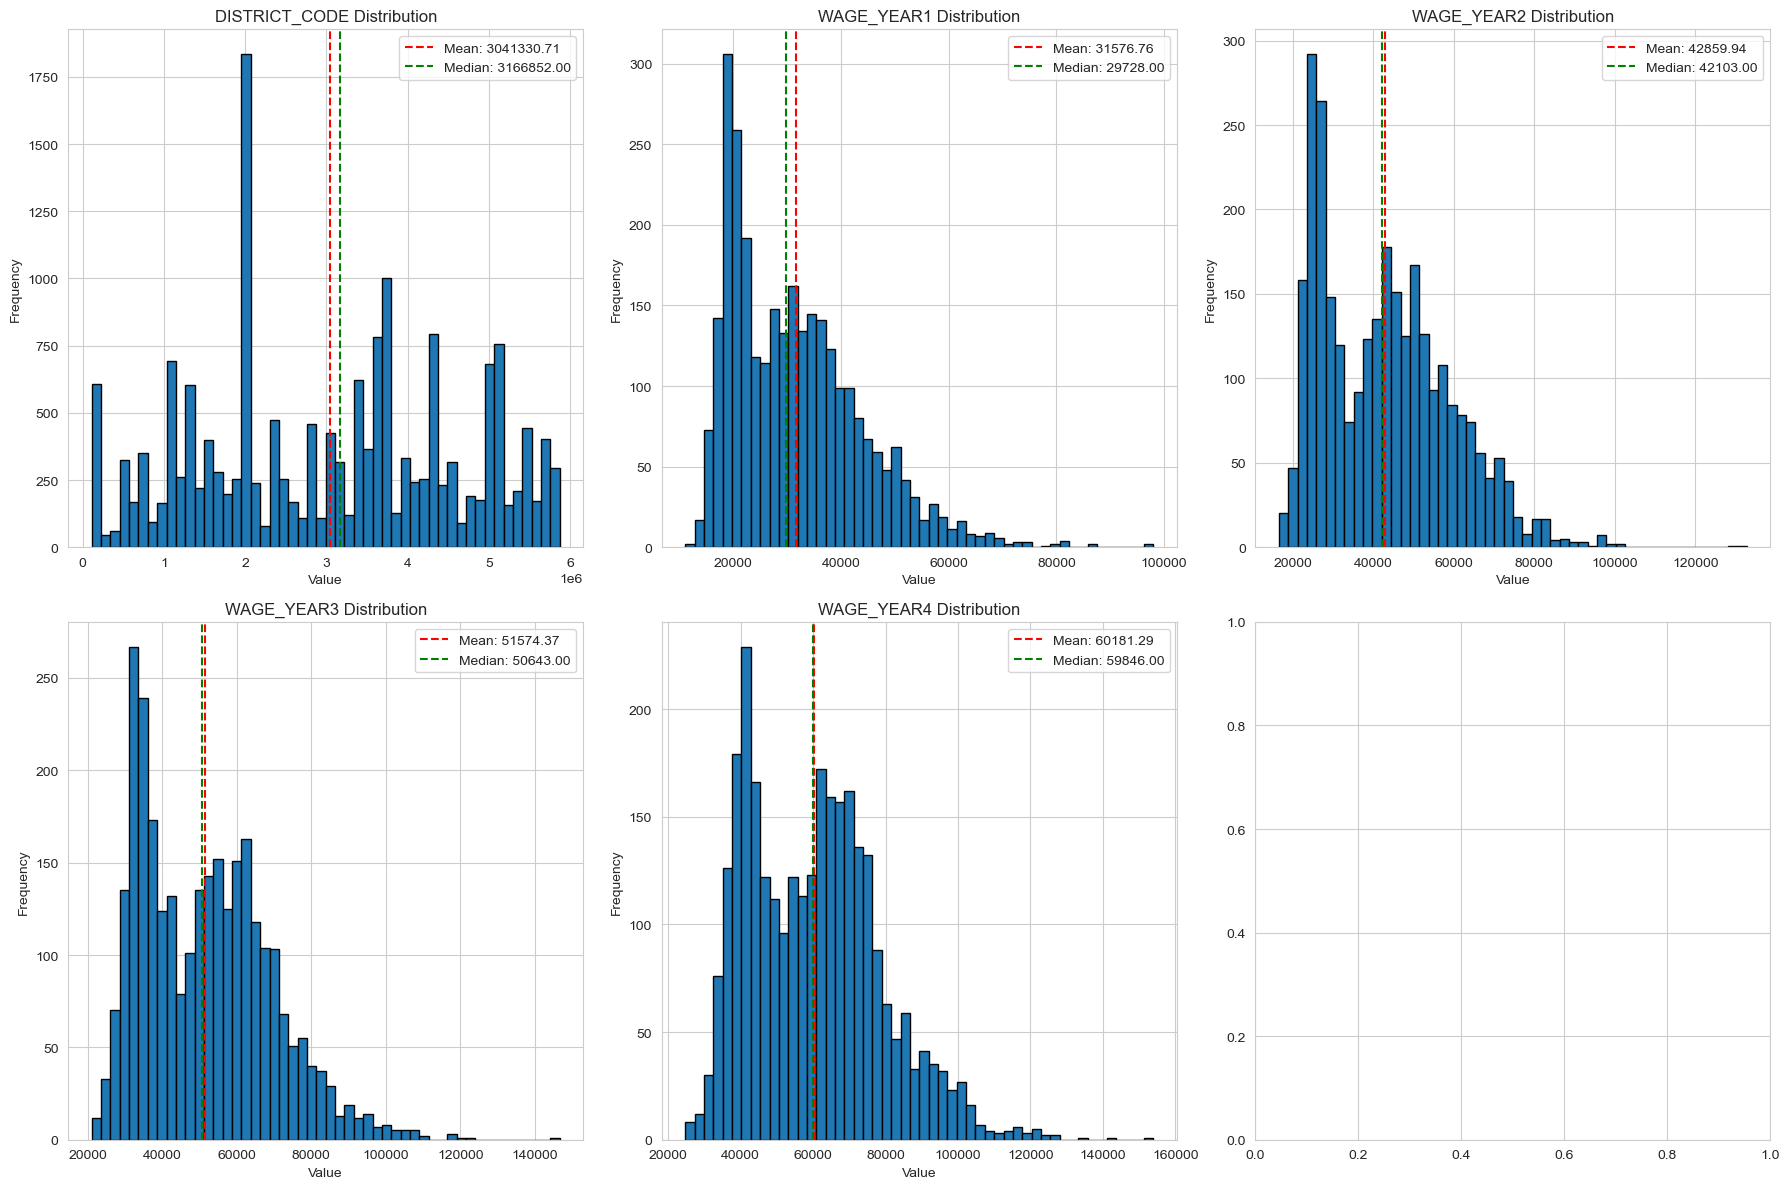

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols[:6]):
    if col in df.columns:
        if 'WAGE' in col:
            data = df[df[col] > 0][col]
        else:
            data = df[col].dropna()
        
        if len(data) > 0:
            axes[idx].hist(data, bins=50, edgecolor='black')
            axes[idx].set_title(f'{col} Distribution')
            axes[idx].set_xlabel('Value')
            axes[idx].set_ylabel('Frequency')
            axes[idx].axvline(data.mean(), color='r', linestyle='--', label=f'Mean: {data.mean():.2f}')
            axes[idx].axvline(data.median(), color='g', linestyle='--', label=f'Median: {data.median():.2f}')
            axes[idx].legend()

plt.tight_layout()
plt.show()

#### Relationships Between Features


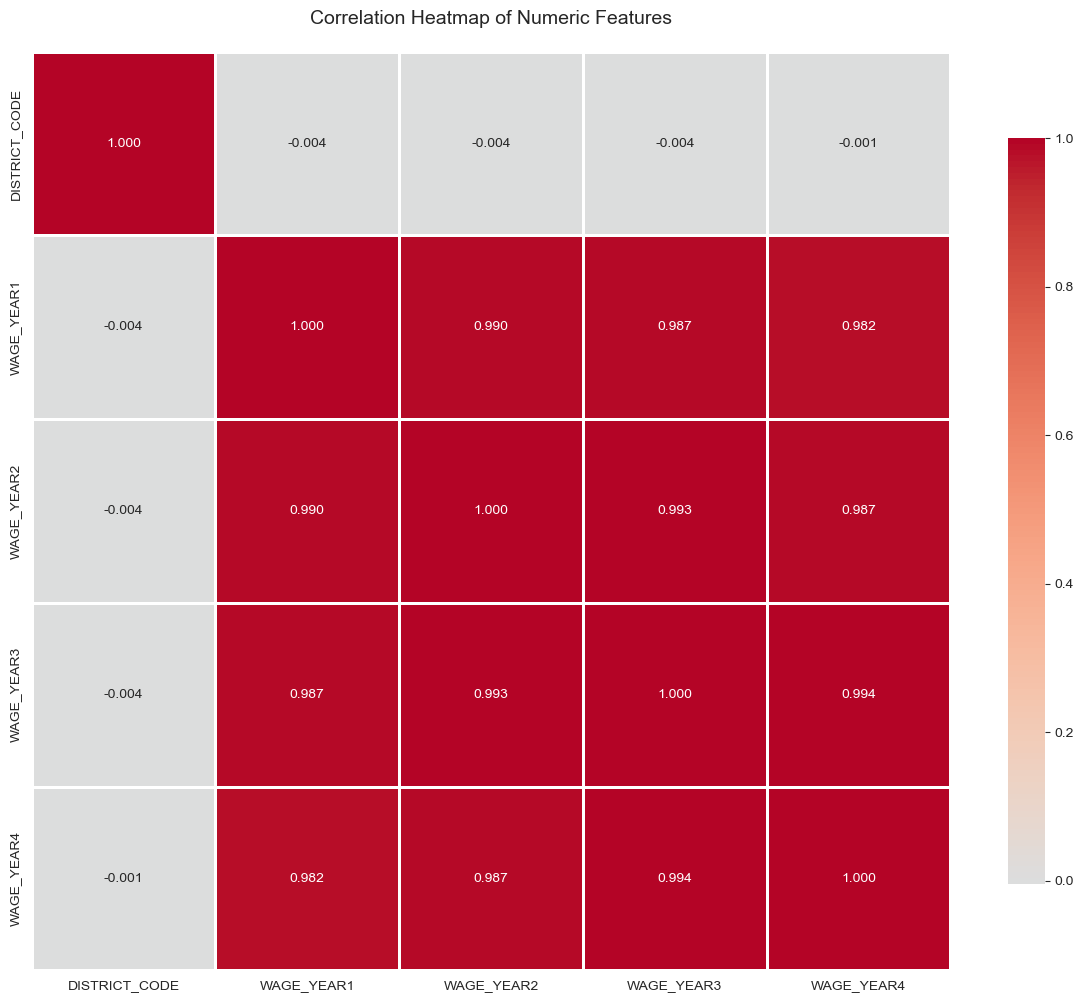

Correlation Matrix:
               DISTRICT_CODE  WAGE_YEAR1  WAGE_YEAR2  WAGE_YEAR3  WAGE_YEAR4
DISTRICT_CODE       1.000000   -0.003839   -0.004325   -0.003590   -0.001438
WAGE_YEAR1         -0.003839    1.000000    0.990263    0.986502    0.981711
WAGE_YEAR2         -0.004325    0.990263    1.000000    0.992555    0.987440
WAGE_YEAR3         -0.003590    0.986502    0.992555    1.000000    0.993653
WAGE_YEAR4         -0.001438    0.981711    0.987440    0.993653    1.000000


In [59]:
# Correlation analysis for numeric features
numeric_features = ['DISTRICT_CODE', 'WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']
correlation_matrix = df[numeric_features].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numeric Features', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Print correlation values
print("Correlation Matrix:")
print(correlation_matrix)


##### Pairwise Relationships Between Wage Years


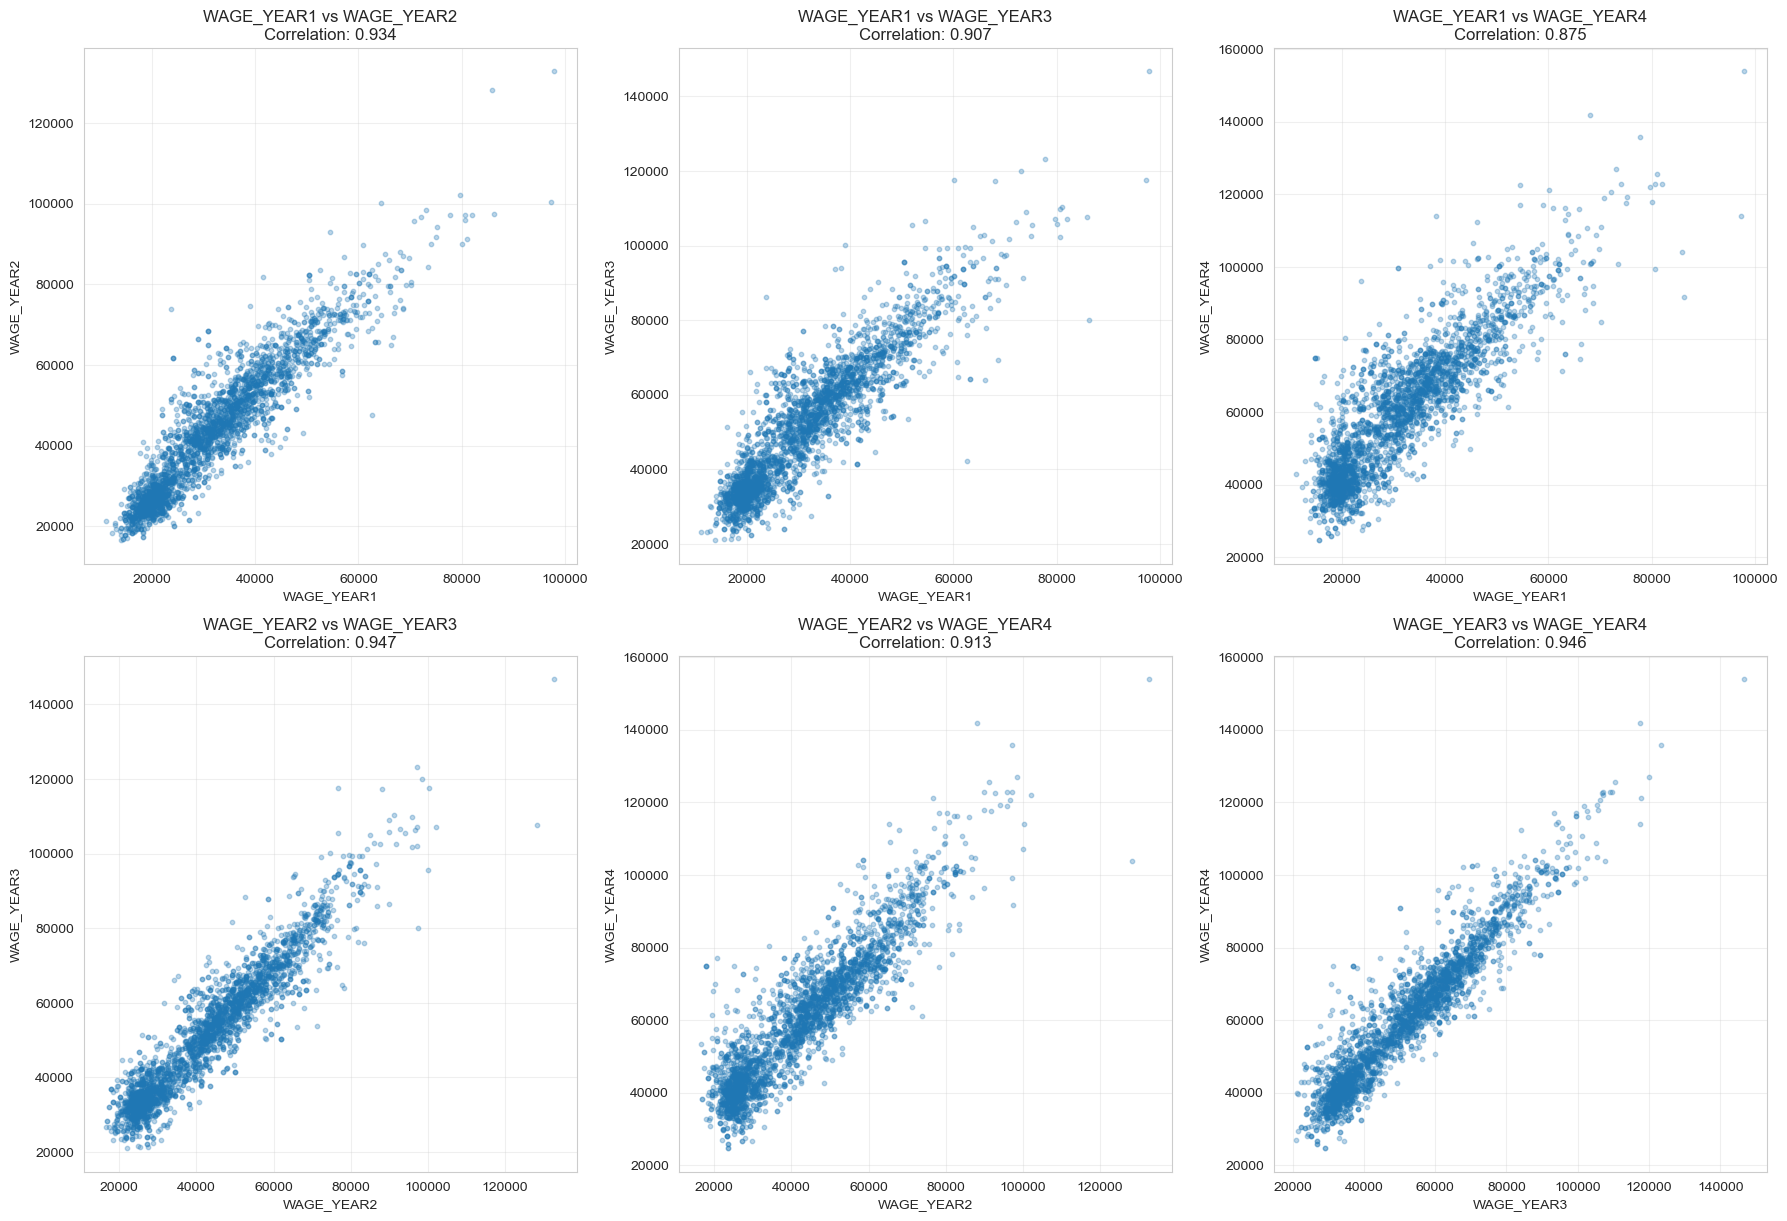

In [60]:
# Pairwise scatter plots for wage years (non-zero values only)
wage_cols = ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']
df_wage_nonzero = df[df[wage_cols].sum(axis=1) > 0].copy()

# Create pairwise scatter plots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

plot_idx = 0
for i in range(len(wage_cols)):
    for j in range(i+1, len(wage_cols)):
        col1, col2 = wage_cols[i], wage_cols[j]
        data = df_wage_nonzero[[col1, col2]].dropna()
        
        if len(data) > 0:
            axes[plot_idx].scatter(data[col1], data[col2], alpha=0.3, s=10)
            axes[plot_idx].set_xlabel(col1)
            axes[plot_idx].set_ylabel(col2)
            axes[plot_idx].set_title(f'{col1} vs {col2}\nCorrelation: {data[col1].corr(data[col2]):.3f}')
            axes[plot_idx].grid(True, alpha=0.3)
        plot_idx += 1

# Remove unused subplots
for idx in range(plot_idx, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


##### Relationships Between Categorical Features and Wages


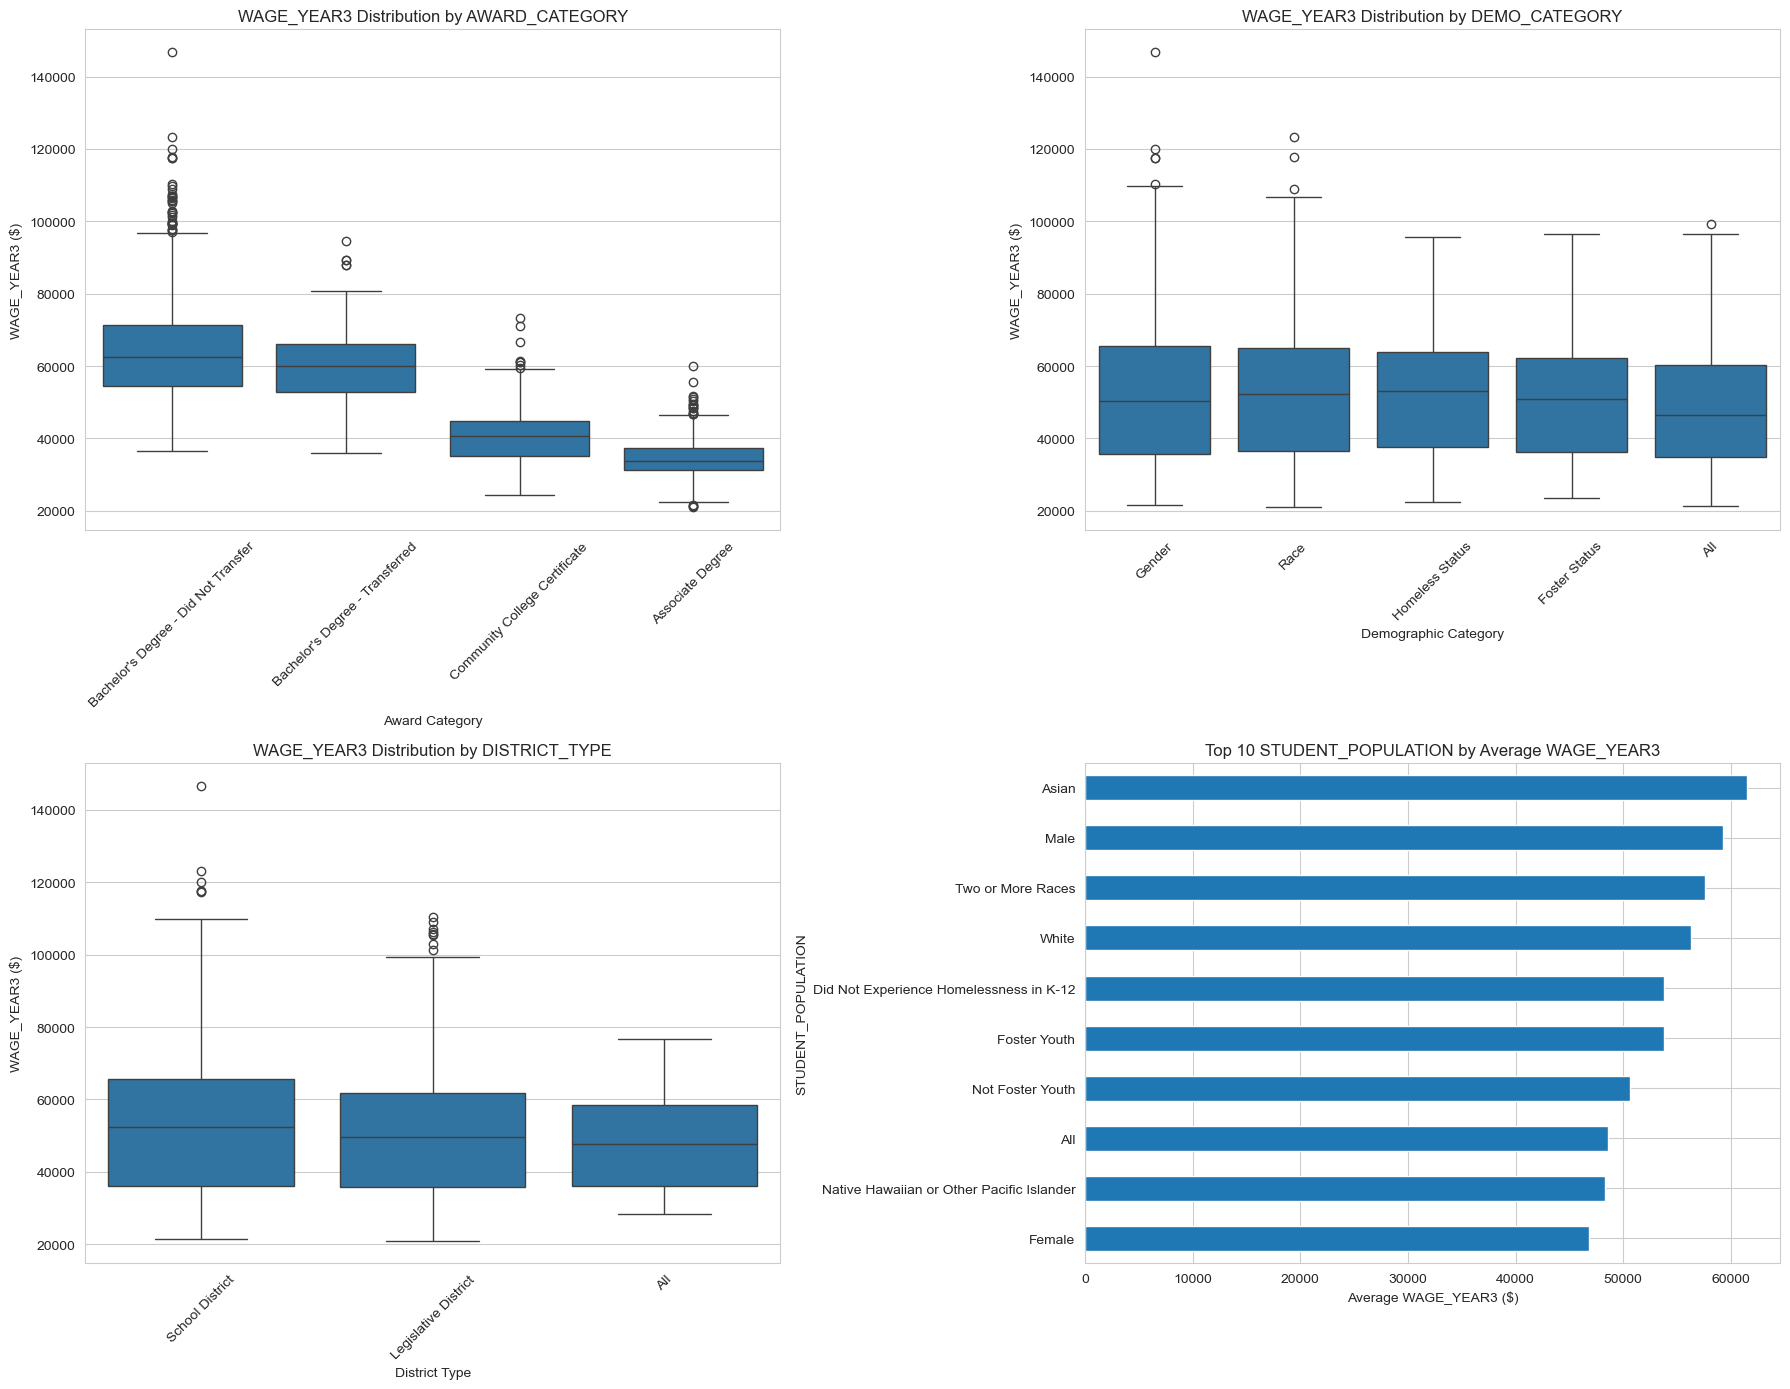


Average WAGE_YEAR3 by AWARD_CATEGORY:
                                              mean   median  count
AWARD_CATEGORY                                                    
Bachelor's Degree - Did Not Transfer  64457.615100  62530.0   1351
Bachelor's Degree - Transferred       60088.500000  59947.0    310
Community College Certificate         40728.316498  40771.0    297
Associate Degree                      34354.949846  33798.0    977

Average WAGE_YEAR3 by DEMO_CATEGORY:
                         mean   median  count
DEMO_CATEGORY                                
Gender           52998.847356  50314.5    832
Race             52916.696356  52234.0    741
Homeless Status  52352.052045  53006.0    269
Foster Status    50627.021378  50915.0    421
All              48612.764881  46578.0    672


In [61]:
# Analyze relationships between categorical features and wages
# Create box plots showing wage distributions by categorical features

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# WAGE_YEAR3 by AWARD_CATEGORY
df_nonzero_wage3 = df[df['WAGE_YEAR3'] > 0].copy()
award_order = df_nonzero_wage3.groupby('AWARD_CATEGORY')['WAGE_YEAR3'].mean().sort_values(ascending=False).index
sns.boxplot(data=df_nonzero_wage3, x='AWARD_CATEGORY', y='WAGE_YEAR3', order=award_order, ax=axes[0, 0])
axes[0, 0].set_title('WAGE_YEAR3 Distribution by AWARD_CATEGORY', fontsize=12)
axes[0, 0].set_xlabel('Award Category')
axes[0, 0].set_ylabel('WAGE_YEAR3 ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# WAGE_YEAR3 by DEMO_CATEGORY
demo_order = df_nonzero_wage3.groupby('DEMO_CATEGORY')['WAGE_YEAR3'].mean().sort_values(ascending=False).index
sns.boxplot(data=df_nonzero_wage3, x='DEMO_CATEGORY', y='WAGE_YEAR3', order=demo_order, ax=axes[0, 1])
axes[0, 1].set_title('WAGE_YEAR3 Distribution by DEMO_CATEGORY', fontsize=12)
axes[0, 1].set_xlabel('Demographic Category')
axes[0, 1].set_ylabel('WAGE_YEAR3 ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# WAGE_YEAR3 by DISTRICT_TYPE
district_order = df_nonzero_wage3.groupby('DISTRICT_TYPE')['WAGE_YEAR3'].mean().sort_values(ascending=False).index
sns.boxplot(data=df_nonzero_wage3, x='DISTRICT_TYPE', y='WAGE_YEAR3', order=district_order, ax=axes[1, 0])
axes[1, 0].set_title('WAGE_YEAR3 Distribution by DISTRICT_TYPE', fontsize=12)
axes[1, 0].set_xlabel('District Type')
axes[1, 0].set_ylabel('WAGE_YEAR3 ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Top STUDENT_POPULATION groups by average wage
top_populations = df_nonzero_wage3.groupby('STUDENT_POPULATION')['WAGE_YEAR3'].mean().sort_values(ascending=False).head(10)
top_populations.plot(kind='barh', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 STUDENT_POPULATION by Average WAGE_YEAR3', fontsize=12)
axes[1, 1].set_xlabel('Average WAGE_YEAR3 ($)')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Print correlation statistics
print("\nAverage WAGE_YEAR3 by AWARD_CATEGORY:")
print(df_nonzero_wage3.groupby('AWARD_CATEGORY')['WAGE_YEAR3'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
print("\nAverage WAGE_YEAR3 by DEMO_CATEGORY:")
print(df_nonzero_wage3.groupby('DEMO_CATEGORY')['WAGE_YEAR3'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))


#### CS562 Questions


##### WAGE_YEAR3

In [62]:
df_nonzero = df[(df['WAGE_YEAR3'] > 0) & 
                (df['STUDENT_POPULATION'] != 'None Reported') & 
                (df['STUDENT_POPULATION'] != 'All')].copy()
# Group by DEMO_CATEGORY and STUDENT_POPULATION
demo_wage = df_nonzero.groupby(['DEMO_CATEGORY', 'STUDENT_POPULATION'])['WAGE_YEAR3'].agg(['mean', 'count']).reset_index()
demo_wage = demo_wage.sort_values('mean', ascending=False)



Visualization 4

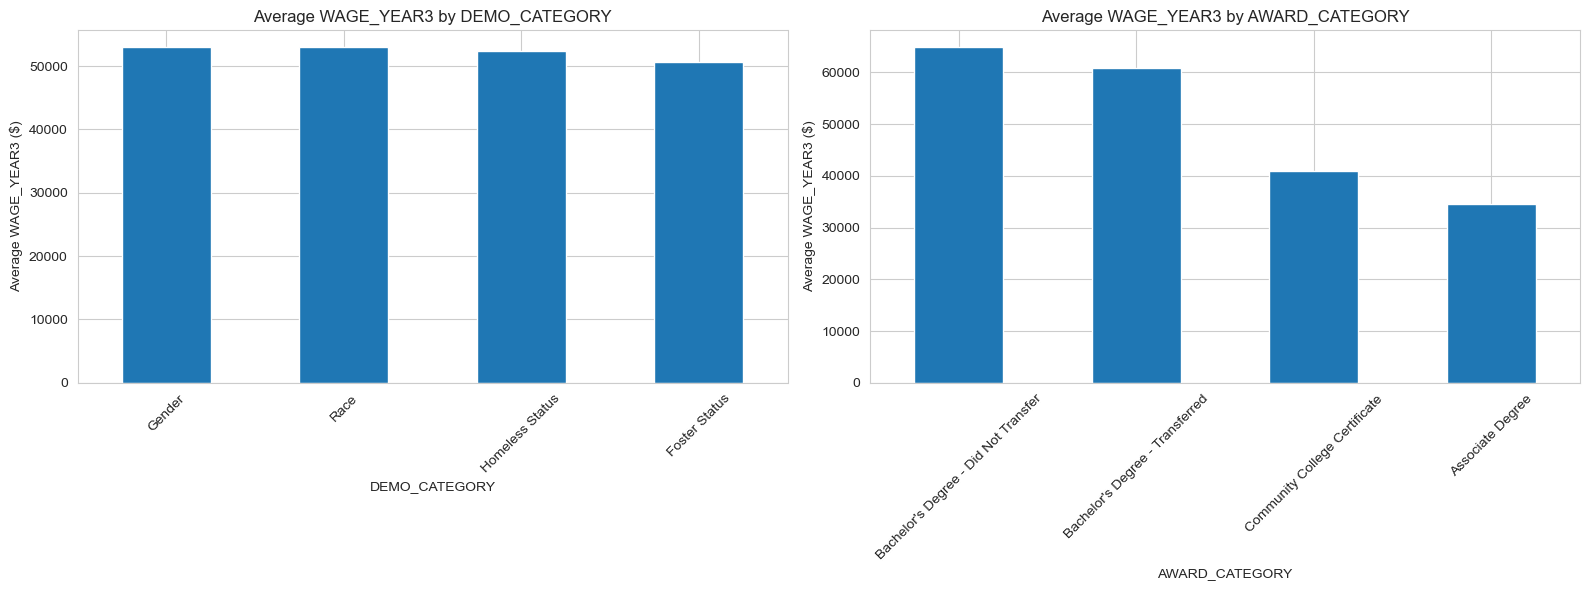

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# By DEMO_CATEGORY
demo_cat_wage = df_nonzero.groupby('DEMO_CATEGORY')['WAGE_YEAR3'].mean().sort_values(ascending=False)
demo_cat_wage.plot(kind='bar', ax=axes[0])
axes[0].set_title('Average WAGE_YEAR3 by DEMO_CATEGORY')
axes[0].set_ylabel('Average WAGE_YEAR3 ($)')
axes[0].tick_params(axis='x', rotation=45)

# By AWARD_CATEGORY
award_wage = df_nonzero.groupby('AWARD_CATEGORY')['WAGE_YEAR3'].mean().sort_values(ascending=False)
award_wage.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average WAGE_YEAR3 by AWARD_CATEGORY')
axes[1].set_ylabel('Average WAGE_YEAR3 ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Highest demographics by average WAGE_YEAR3

In [64]:
highest_demo = demo_wage.iloc[0]
print(f"\nHighest WAGE_YEAR3: {highest_demo['DEMO_CATEGORY']} - {highest_demo['STUDENT_POPULATION']} (${highest_demo['mean']:,.2f})")




Highest WAGE_YEAR3: Race - Asian ($61,497.25)


Lowest by WAGE_YEAR3

In [65]:
lowest_demo = demo_wage.iloc[-1]
print(f"Lowest WAGE_YEAR3: {lowest_demo['DEMO_CATEGORY']} - {lowest_demo['STUDENT_POPULATION']} (${lowest_demo['mean']:,.2f})")

Lowest WAGE_YEAR3: Homeless Status - Experienced Homelessness in K-12 ($42,112.33)


Visualization 5

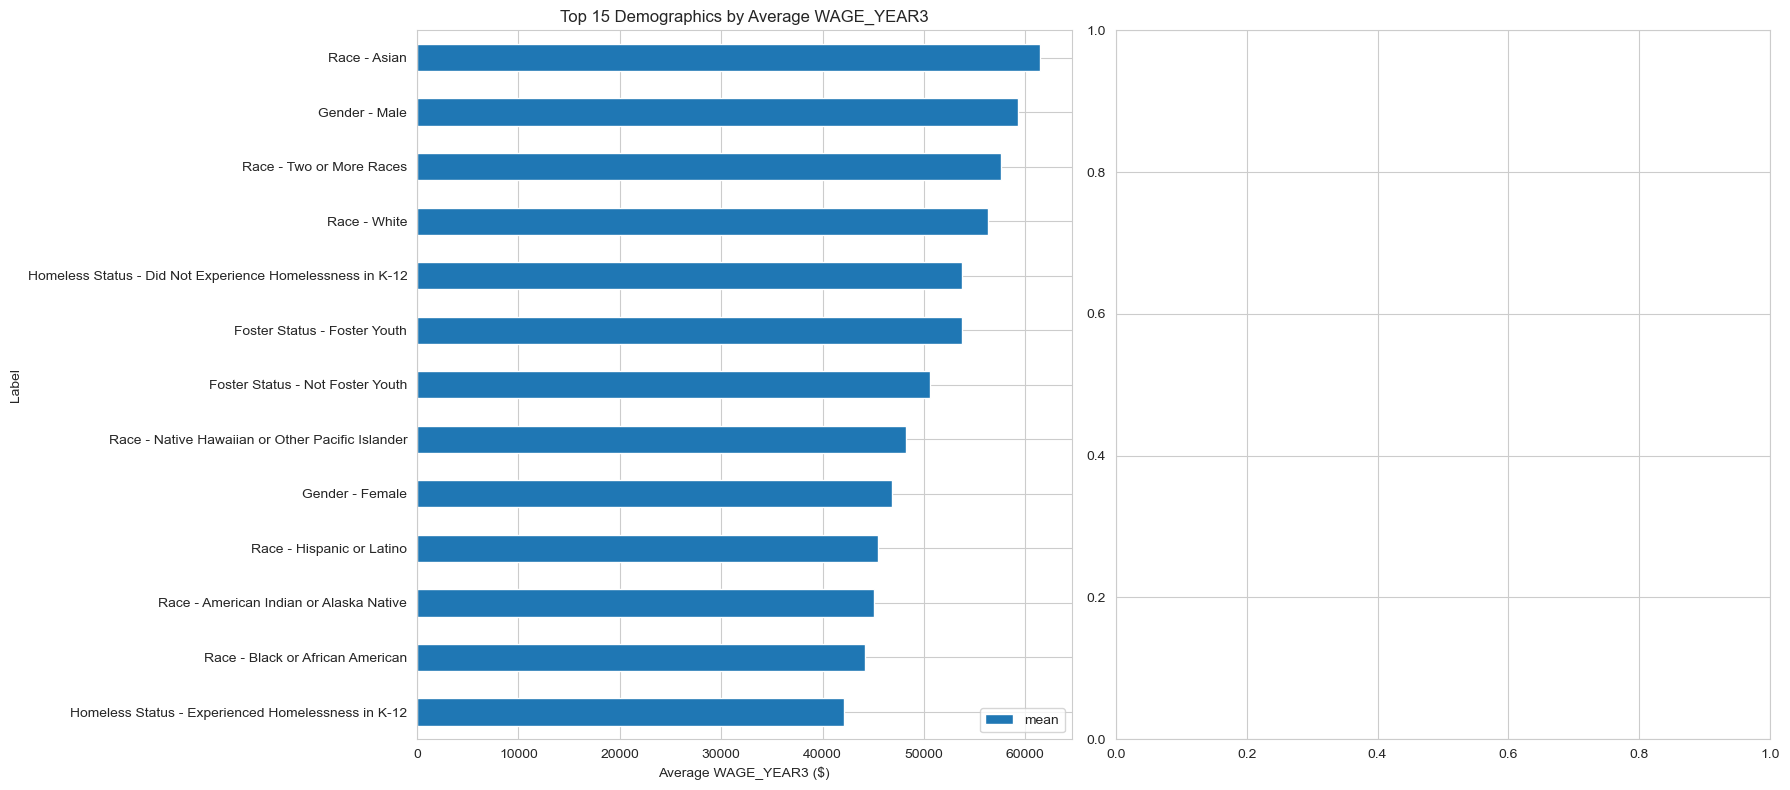

In [66]:
# Visualization 5: Top and Bottom Demographics
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 demographics
top_15 = demo_wage.head(15)
top_15['Label'] = top_15['DEMO_CATEGORY'] + ' - ' + top_15['STUDENT_POPULATION']
top_15.plot(x='Label', y='mean', kind='barh', ax=axes[0])
axes[0].set_title('Top 15 Demographics by Average WAGE_YEAR3')
axes[0].set_xlabel('Average WAGE_YEAR3 ($)')
axes[0].invert_yaxis()


plt.tight_layout()
plt.show()

##### Negative Wage Trends

In [67]:
df_nonzero['WAGE_TREND'] = df_nonzero['WAGE_YEAR3'] - df_nonzero['WAGE_YEAR1']
df_nonzero['WAGE_TREND_PCT'] = ((df_nonzero['WAGE_YEAR3'] - df_nonzero['WAGE_YEAR1']) / df_nonzero['WAGE_YEAR1'] * 100)

In [68]:
negative_trend = df_nonzero[df_nonzero['WAGE_TREND'] < 0]

if len(negative_trend) > 0:
    neg_demo = negative_trend.groupby(['DEMO_CATEGORY', 'STUDENT_POPULATION']).agg({
        'WAGE_TREND': ['mean', 'count'],
        'WAGE_YEAR1': 'mean',
        'WAGE_YEAR3': 'mean'
    }).round(2)
    neg_demo.columns = ['Avg_Trend', 'Count', 'Avg_Wage_Y1', 'Avg_Wage_Y3']
    neg_demo = neg_demo.sort_values('Count', ascending=False)
    print(neg_demo.head(15))
    
    print("\nBy AWARD_CATEGORY:")
    print(negative_trend.groupby('AWARD_CATEGORY')['WAGE_TREND'].agg(['mean', 'count']).sort_values('count', ascending=False))


                                  Avg_Trend  Count  Avg_Wage_Y1  Avg_Wage_Y3
DEMO_CATEGORY STUDENT_POPULATION                                            
Foster Status Not Foster Youth     -2009.67      3     35899.67      33890.0
Gender        Male                 -5620.00      2     59360.50      53740.5
Race          Hispanic or Latino    -844.00      1     28199.00      27355.0
              White                -2054.00      1     66051.00      63997.0

By AWARD_CATEGORY:
                                             mean  count
AWARD_CATEGORY                                          
Bachelor's Degree - Did Not Transfer -2836.000000      3
Community College Certificate        -2847.333333      3
Associate Degree                     -3117.000000      1


##### Positive Wage Trends

In [69]:
positive_trend = df_nonzero[df_nonzero['WAGE_TREND'] > 0]

if len(positive_trend) > 0:
    pos_demo = positive_trend.groupby(['DEMO_CATEGORY', 'STUDENT_POPULATION']).agg({
        'WAGE_TREND': ['mean', 'count'],
        'WAGE_YEAR1': 'mean',
        'WAGE_YEAR3': 'mean'
    }).round(2)
    pos_demo.columns = ['Avg_Trend', 'Count', 'Avg_Wage_Y1', 'Avg_Wage_Y3']
    pos_demo = pos_demo.sort_values('Count', ascending=False)
    print(pos_demo.head(15))
    
    print("\nBy AWARD_CATEGORY:")
    print(positive_trend.groupby('AWARD_CATEGORY')['WAGE_TREND'].agg(['mean', 'count']).sort_values('count', ascending=False))


                                                           Avg_Trend  Count  \
DEMO_CATEGORY   STUDENT_POPULATION                                            
Gender          Female                                      18769.12    421   
Foster Status   Not Foster Youth                            19543.29    416   
Gender          Male                                        22130.78    409   
Race            Hispanic or Latino                          17472.93    292   
                White                                       22847.11    243   
Homeless Status Did Not Experience Homelessness in K-12     21230.33    236   
Race            Asian                                       23516.05    174   
Homeless Status Experienced Homelessness in K-12            14805.64     33   
Race            Black or African American                   17104.60     15   
                Two or More Races                           21803.00      9   
Foster Status   Foster Youth                        

Visualization 6

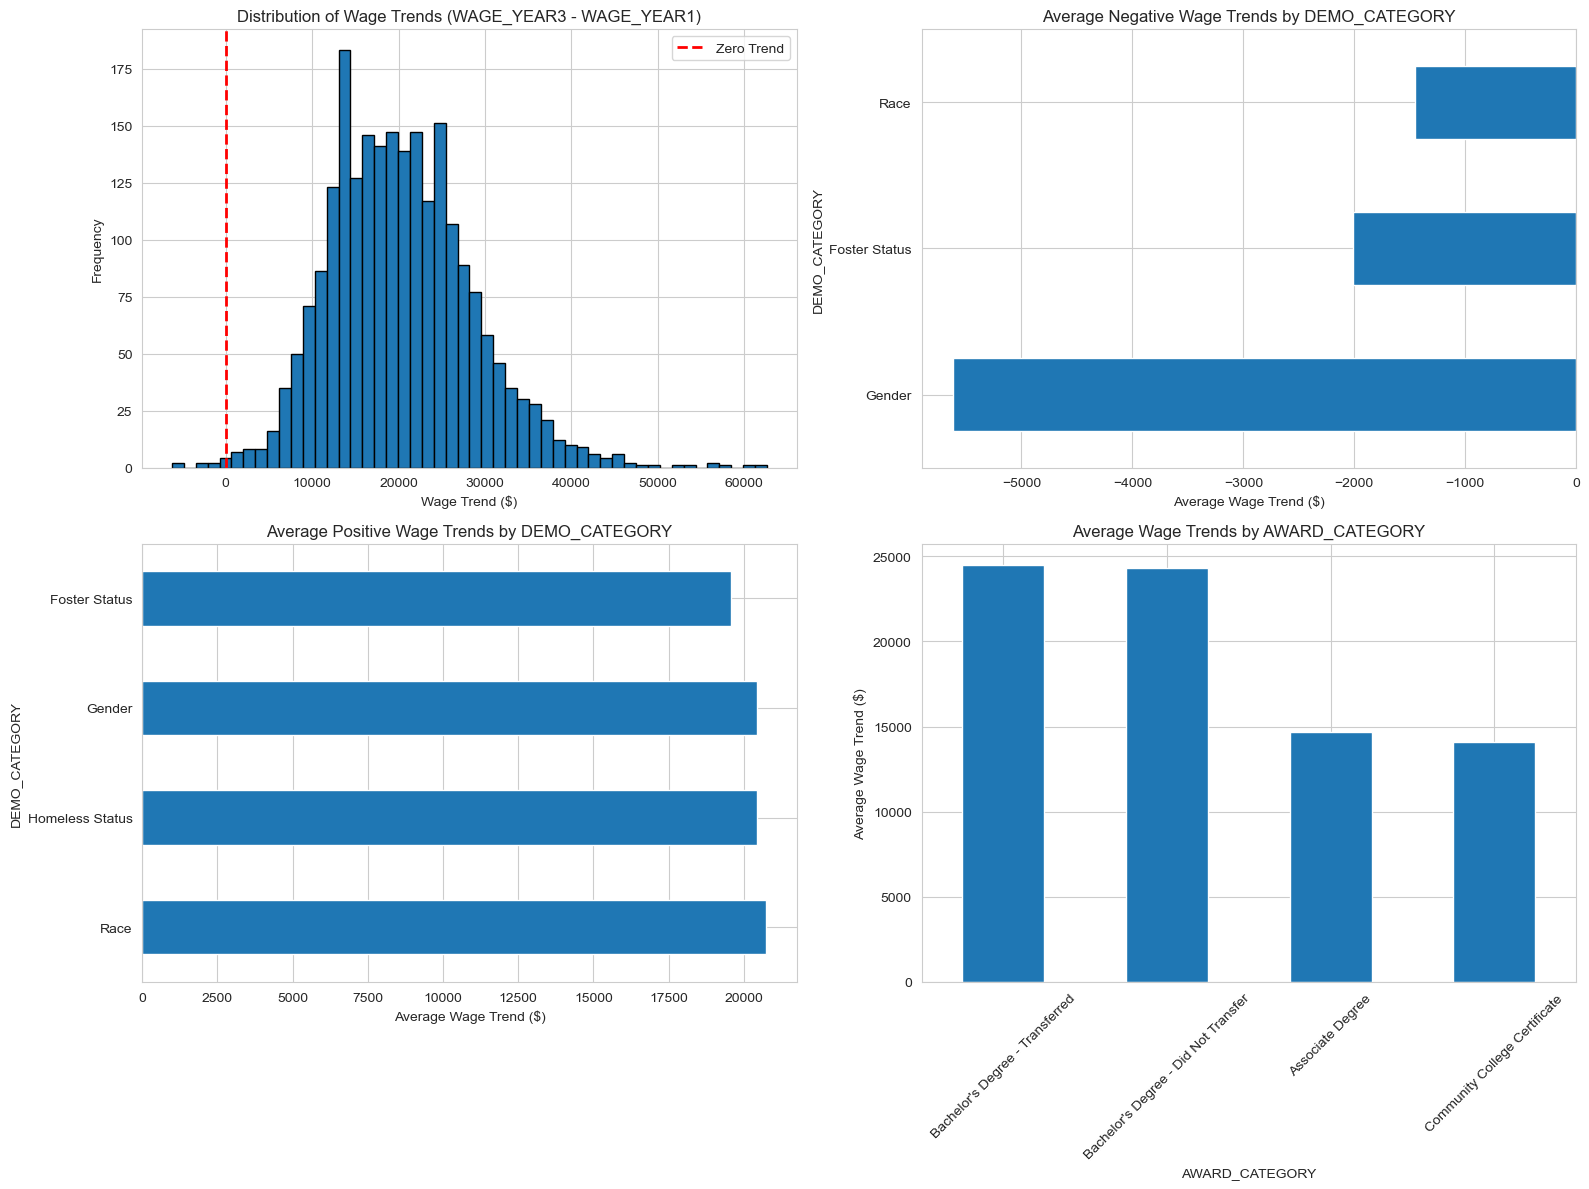

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of wage trends
axes[0, 0].hist(df_nonzero['WAGE_TREND'], bins=50, edgecolor='black')
axes[0, 0].axvline(0, color='r', linestyle='--', linewidth=2, label='Zero Trend')
axes[0, 0].set_title('Distribution of Wage Trends (WAGE_YEAR3 - WAGE_YEAR1)')
axes[0, 0].set_xlabel('Wage Trend ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Negative trends by demographic
if len(negative_trend) > 0:
    neg_by_demo = negative_trend.groupby('DEMO_CATEGORY')['WAGE_TREND'].mean().sort_values()
    neg_by_demo.plot(kind='barh', ax=axes[0, 1])
    axes[0, 1].set_title('Average Negative Wage Trends by DEMO_CATEGORY')
    axes[0, 1].set_xlabel('Average Wage Trend ($)')

# Positive trends by demographic
if len(positive_trend) > 0:
    pos_by_demo = positive_trend.groupby('DEMO_CATEGORY')['WAGE_TREND'].mean().sort_values(ascending=False)
    pos_by_demo.plot(kind='barh', ax=axes[1, 0])
    axes[1, 0].set_title('Average Positive Wage Trends by DEMO_CATEGORY')
    axes[1, 0].set_xlabel('Average Wage Trend ($)')

# Wage trends by award category
if len(df_nonzero) > 0:
    trend_by_award = df_nonzero.groupby('AWARD_CATEGORY')['WAGE_TREND'].mean().sort_values(ascending=False)
    trend_by_award.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Average Wage Trends by AWARD_CATEGORY')
    axes[1, 1].set_ylabel('Average Wage Trend ($)')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Overall series of wages

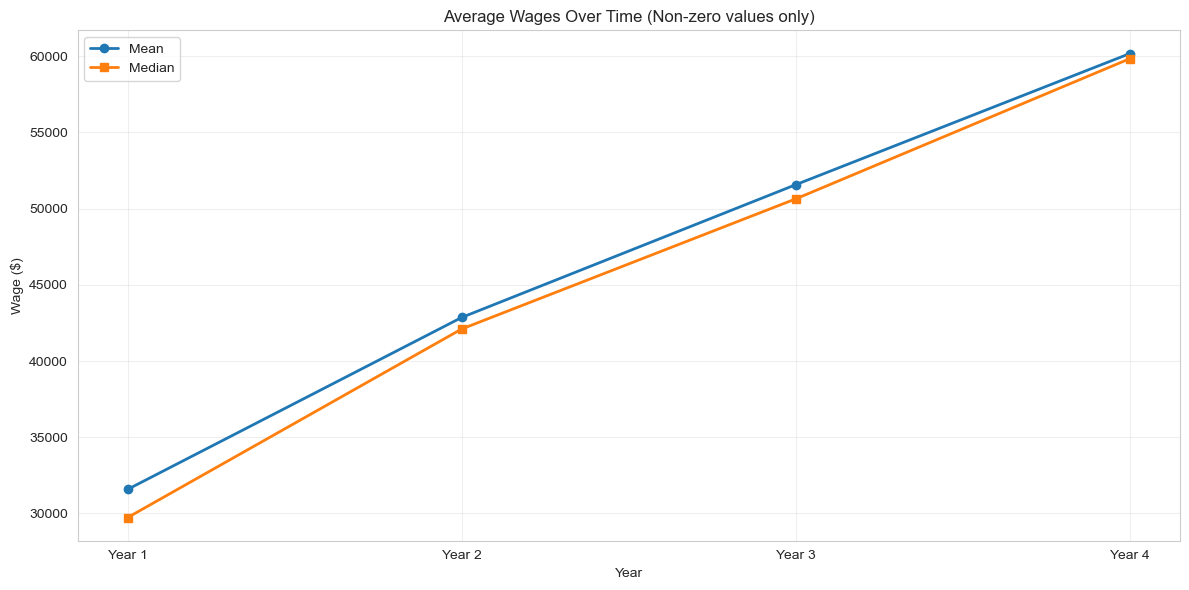

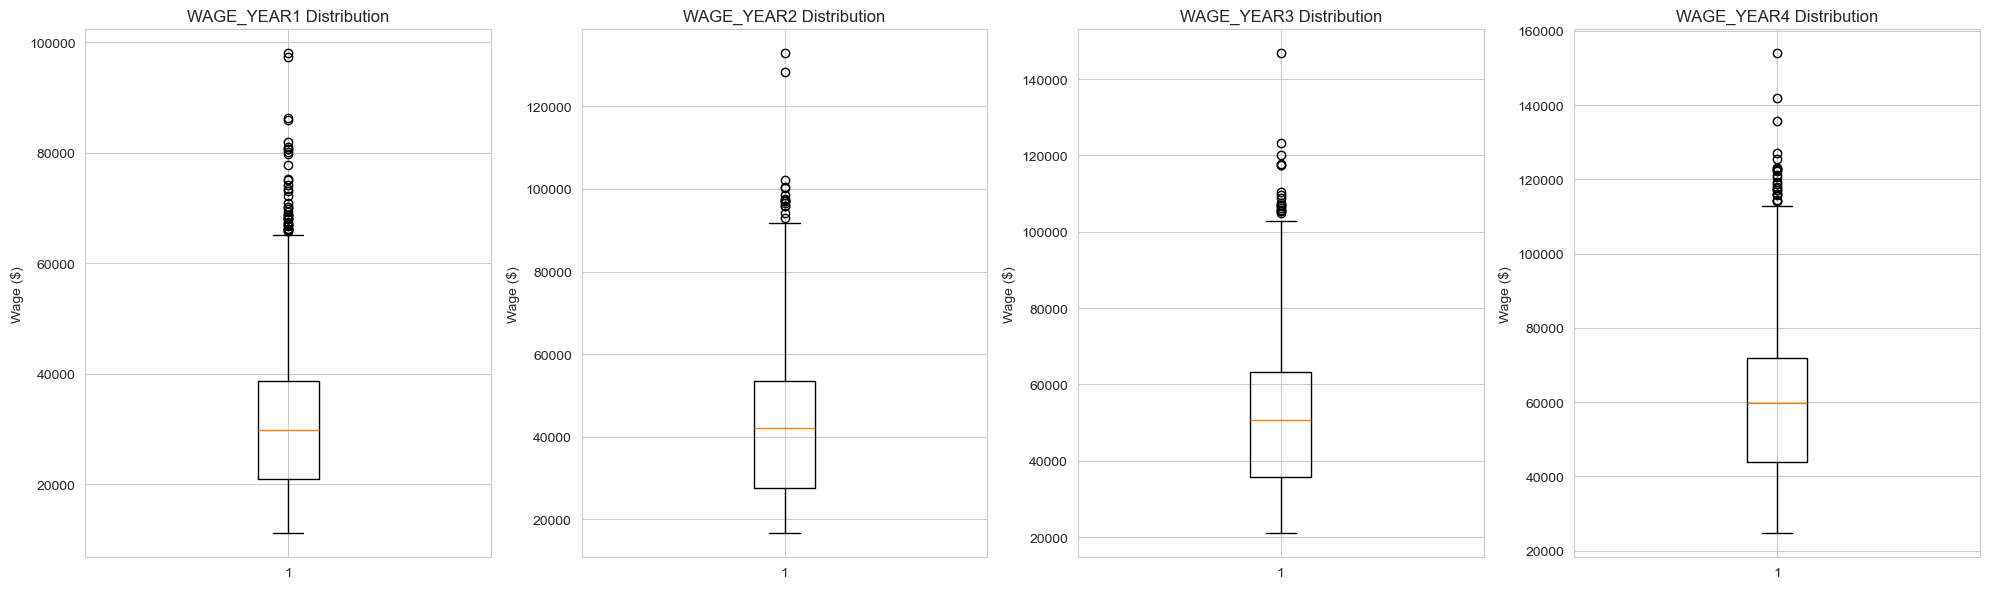

In [71]:
fig, ax = plt.subplots(figsize=(12, 6))
wage_cols = ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']
wage_means = [df[df[col] > 0][col].mean() for col in wage_cols]
wage_medians = [df[df[col] > 0][col].median() for col in wage_cols]

x = range(1, 5)
ax.plot(x, wage_means, marker='o', label='Mean', linewidth=2)
ax.plot(x, wage_medians, marker='s', label='Median', linewidth=2)
ax.set_title('Average Wages Over Time (Non-zero values only)')
ax.set_xlabel('Year')
ax.set_ylabel('Wage ($)')
ax.set_xticks(x)
ax.set_xticklabels(['Year 1', 'Year 2', 'Year 3', 'Year 4'])
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization 8: Box plots for wage distributions
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
for idx, col in enumerate(wage_cols):
    data = df[df[col] > 0][col]
    if len(data) > 0:
        axes[idx].boxplot(data, vert=True)
        axes[idx].set_title(f'{col} Distribution')
        axes[idx].set_ylabel('Wage ($)')
plt.tight_layout()
plt.show()

### Model to predict WAGE_YEAR4

In [72]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

#### Improved Models with Feature Engineering


In [73]:
# Feature Engineering: Create additional features
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Create enhanced feature set
df_model_enhanced = df.copy()

# Handle missing DISTRICT_CODE
df_model_enhanced['DISTRICT_CODE'] = df_model_enhanced['DISTRICT_CODE'].fillna(df_model_enhanced['DISTRICT_CODE'].median())

# Drop columns
df_model_enhanced = df_model_enhanced.drop('ACADEMIC_YEAR', axis=1)
df_model_enhanced = df_model_enhanced.drop('DISTRICT_NAME', axis=1)

# Feature Engineering: Create interaction and derived features
df_model_enhanced['WAGE_TREND_Y1_Y2'] = df_model_enhanced['WAGE_YEAR2'] - df_model_enhanced['WAGE_YEAR1']
df_model_enhanced['WAGE_TREND_Y2_Y3'] = df_model_enhanced['WAGE_YEAR3'] - df_model_enhanced['WAGE_YEAR2']
df_model_enhanced['WAGE_AVG_Y1_Y3'] = (df_model_enhanced['WAGE_YEAR1'] + df_model_enhanced['WAGE_YEAR3']) / 2
df_model_enhanced['WAGE_GROWTH_RATE'] = np.where(df_model_enhanced['WAGE_YEAR1'] > 0,
                                                  (df_model_enhanced['WAGE_YEAR3'] - df_model_enhanced['WAGE_YEAR1']) / df_model_enhanced['WAGE_YEAR1'],
                                                  0)

# Encode categorical variables
categorical_cols = ['DISTRICT_TYPE', 'DEMO_CATEGORY', 'STUDENT_POPULATION', 'AWARD_CATEGORY']
label_encoders_enhanced = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model_enhanced[col + '_encoded'] = le.fit_transform(df_model_enhanced[col].astype(str))
    label_encoders_enhanced[col] = le
    df_model_enhanced = df_model_enhanced.drop(col, axis=1)

# Prepare features and target
feature_cols_enhanced = [col for col in df_model_enhanced.columns if col != 'WAGE_YEAR4']
X_enhanced = df_model_enhanced[feature_cols_enhanced]
y_enhanced = df_model_enhanced['WAGE_YEAR4']

# Split data
X_train_enh, X_val_enh, y_train_enh, y_val_enh = train_test_split(X_enhanced, y_enhanced, test_size=0.2, random_state=42)

print(f"Enhanced Features shape: {X_enhanced.shape}")
print(f"Enhanced Feature columns: {feature_cols_enhanced}")


Enhanced Features shape: (20705, 12)
Enhanced Feature columns: ['DISTRICT_CODE', 'WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_TREND_Y1_Y2', 'WAGE_TREND_Y2_Y3', 'WAGE_AVG_Y1_Y3', 'WAGE_GROWTH_RATE', 'DISTRICT_TYPE_encoded', 'DEMO_CATEGORY_encoded', 'STUDENT_POPULATION_encoded', 'AWARD_CATEGORY_encoded']


In [74]:
# Try advanced models with enhanced features
models_enhanced = {
    'Random Forest (n_est=100, max_depth=15)': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Random Forest (n_est=200, max_depth=20)': RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1),
    'Gradient Boosting (n_est=100)': GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    'Gradient Boosting (n_est=200)': GradientBoostingRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42),
    'KNN (k=3, scaled)': KNeighborsRegressor(n_neighbors=3),
    'KNN (k=5, scaled)': KNeighborsRegressor(n_neighbors=5),
    'KNN (k=7, scaled)': KNeighborsRegressor(n_neighbors=7),
}

# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enh)
X_val_scaled = scaler.transform(X_val_enh)

results_enhanced = {}

for name, model in models_enhanced.items():
    # Use scaled features for KNN
    if 'KNN' in name:
        X_tr = X_train_scaled
        X_v = X_val_scaled
    else:
        X_tr = X_train_enh
        X_v = X_val_enh
    
    # Fit the model
    model.fit(X_tr, y_train_enh)
    
    # Make predictions
    y_pred_train = model.predict(X_tr)
    y_pred_val = model.predict(X_v)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_enh, y_pred_train))
    val_rmse = np.sqrt(mean_squared_error(y_val_enh, y_pred_val))
    train_r2 = r2_score(y_train_enh, y_pred_train)
    val_r2 = r2_score(y_val_enh, y_pred_val)
    val_mae = mean_absolute_error(y_val_enh, y_pred_val)
    
    results_enhanced[name] = {
        'model': model,
        'scaler': scaler if 'KNN' in name else None,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'val_mae': val_mae
    }
    
    print(f"\n{name}:")
    print(f"  Train RMSE: {train_rmse:.2f}")
    print(f"  Validation RMSE: {val_rmse:.2f}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Validation R²: {val_r2:.4f}")
    print(f"  Validation MAE: {val_mae:.2f}")



Random Forest (n_est=100, max_depth=15):
  Train RMSE: 856.66
  Validation RMSE: 1866.59
  Train R²: 0.9985
  Validation R²: 0.9928
  Validation MAE: 485.31

Random Forest (n_est=200, max_depth=20):
  Train RMSE: 751.51
  Validation RMSE: 1855.37
  Train R²: 0.9988
  Validation R²: 0.9928
  Validation MAE: 475.56

Gradient Boosting (n_est=100):
  Train RMSE: 1343.03
  Validation RMSE: 1919.06
  Train R²: 0.9963
  Validation R²: 0.9923
  Validation MAE: 514.51

Gradient Boosting (n_est=200):
  Train RMSE: 1090.50
  Validation RMSE: 1858.44
  Train R²: 0.9976
  Validation R²: 0.9928
  Validation MAE: 490.14

KNN (k=3, scaled):
  Train RMSE: 1837.40
  Validation RMSE: 2571.52
  Train R²: 0.9931
  Validation R²: 0.9863
  Validation MAE: 699.71

KNN (k=5, scaled):
  Train RMSE: 2054.35
  Validation RMSE: 2424.93
  Train R²: 0.9914
  Validation R²: 0.9878
  Validation MAE: 660.14

KNN (k=7, scaled):
  Train RMSE: 2155.48
  Validation RMSE: 2370.46
  Train R²: 0.9905
  Validation R²: 0.9883


In [75]:
# Compare all models (original + enhanced)
# Check if results exists (from original models), if not, only use enhanced models
if 'results' in globals() and results:
    all_results = {**results, **results_enhanced}
else:
    all_results = results_enhanced
    print("Note: Using only enhanced models (original models not found)")

best_model_name_overall = min(all_results.keys(), key=lambda x: all_results[x]['val_rmse'])
best_model_overall = all_results[best_model_name_overall]

print(f"\n{'='*60}")
print(f"Best model overall: {best_model_name_overall}")
print(f"Validation RMSE: {best_model_overall['val_rmse']:.2f}")
print(f"Validation R²: {best_model_overall['val_r2']:.4f}")
print(f"Validation MAE: {best_model_overall['val_mae']:.2f}")
print(f"{'='*60}")

# Update best_model variables
best_model_name = best_model_name_overall
best_model = best_model_overall['model']
is_enhanced = best_model_name_overall in results_enhanced
scaler_best = best_model_overall.get('scaler', None)


Note: Using only enhanced models (original models not found)

Best model overall: Random Forest (n_est=200, max_depth=20)
Validation RMSE: 1855.37
Validation R²: 0.9928
Validation MAE: 475.56


#### Retrain Best Model (Enhanced) on Full Training Data


In [76]:
# Retrain best model on full training data with appropriate features
if is_enhanced:
    # Use enhanced features
    if scaler_best is not None:
        # For KNN with scaling
        X_full_scaled = scaler_best.fit_transform(X_enhanced)
        best_model.fit(X_full_scaled, y_enhanced)
        print(f"Model retrained on full training dataset with enhanced features (scaled)")
    else:
        # For tree-based models
        best_model.fit(X_enhanced, y_enhanced)
        print(f"Model retrained on full training dataset with enhanced features")
    print(f"Using {len(feature_cols_enhanced)} features")
    X_full = X_enhanced
    y_full = y_enhanced
else:
    # Use original features
    best_model.fit(X, y)
    print(f"Model retrained on full training dataset with original features")
    print(f"Using {len(feature_cols)} features")
    X_full = X
    y_full = y


Model retrained on full training dataset with enhanced features
Using 12 features


#### Load and Prepare Test Data (Enhanced)


In [77]:
df_test = pd.read_csv('earnings_test_features.csv')

# Apply same preprocessing as training data
if is_enhanced:
    # Use enhanced feature preprocessing
    df_test_model = df_test.copy()
    
    # Handle missing DISTRICT_CODE - use same median from training
    df_test_model['DISTRICT_CODE'] = df_test_model['DISTRICT_CODE'].fillna(df['DISTRICT_CODE'].median())
    
    # Drop columns we dropped in training
    df_test_model = df_test_model.drop('ACADEMIC_YEAR', axis=1)
    df_test_model = df_test_model.drop('DISTRICT_NAME', axis=1)
    
    # Feature Engineering: Create same derived features as training
    df_test_model['WAGE_TREND_Y1_Y2'] = df_test_model['WAGE_YEAR2'] - df_test_model['WAGE_YEAR1']
    df_test_model['WAGE_TREND_Y2_Y3'] = df_test_model['WAGE_YEAR3'] - df_test_model['WAGE_YEAR2']
    df_test_model['WAGE_AVG_Y1_Y3'] = (df_test_model['WAGE_YEAR1'] + df_test_model['WAGE_YEAR3']) / 2
    df_test_model['WAGE_GROWTH_RATE'] = np.where(df_test_model['WAGE_YEAR1'] > 0,
                                                  (df_test_model['WAGE_YEAR3'] - df_test_model['WAGE_YEAR1']) / df_test_model['WAGE_YEAR1'],
                                                  0)
    
    # Encode categorical variables using the same encoders from training
    for col in categorical_cols:
        le = label_encoders_enhanced[col]
        known_classes = set(le.classes_)
        
        test_col = df_test[col].astype(str)
        unknown_mask = ~test_col.isin(known_classes)
        if unknown_mask.any():
            most_common = le.classes_[0]
            test_col[unknown_mask] = most_common
        
        df_test_model[col + '_encoded'] = le.transform(test_col)
        df_test_model = df_test_model.drop(col, axis=1)
    
    # Ensure same column order as training
    X_test = df_test_model[feature_cols_enhanced]
    
    # Scale if needed for KNN
    if scaler_best is not None:
        X_test = scaler_best.transform(X_test)
    
    print(f"Test features shape: {X_test.shape}")
    print(f"Using enhanced features: {len(feature_cols_enhanced)} features")
else:
    # Use original feature preprocessing
    df_test_model = df_test.copy()
    
    # Handle missing DISTRICT_CODE - use same median from training
    df_test_model['DISTRICT_CODE'] = df_test_model['DISTRICT_CODE'].fillna(df['DISTRICT_CODE'].median())
    
    # Drop columns we dropped in training
    df_test_model = df_test_model.drop('ACADEMIC_YEAR', axis=1)
    df_test_model = df_test_model.drop('DISTRICT_NAME', axis=1)
    
    # Encode categorical variables using the same encoders from training
    for col in categorical_cols:
        le = label_encoders[col]
        known_classes = set(le.classes_)
        
        test_col = df_test[col].astype(str)
        unknown_mask = ~test_col.isin(known_classes)
        if unknown_mask.any():
            most_common = le.classes_[0]
            test_col[unknown_mask] = most_common
        
        df_test_model[col + '_encoded'] = le.transform(test_col)
        df_test_model = df_test_model.drop(col, axis=1)
    
    # Ensure same column order as training
    X_test = df_test_model[feature_cols]
    
    print(f"Test features shape: {X_test.shape}")
    print(f"Using original features: {len(feature_cols)} features")


Test features shape: (6902, 12)
Using enhanced features: 12 features


#### Prepare Training Data

In [78]:
# Prepare the training data
# Create a copy for modeling
df_model = df.copy()

# Handle missing DISTRICT_CODE - fill with median
df_model['DISTRICT_CODE'] = df_model['DISTRICT_CODE'].fillna(df_model['DISTRICT_CODE'].median())

# Since ACADEMIC_YEAR has only one value, we can drop it
df_model = df_model.drop('ACADEMIC_YEAR', axis=1)

# DISTRICT_NAME has too many unique values (692), we'll drop it to avoid overfitting
# Alternatively, we could encode it, but with so many categories it's better to drop
df_model = df_model.drop('DISTRICT_NAME', axis=1)

# Encode categorical variables
categorical_cols = ['DISTRICT_TYPE', 'DEMO_CATEGORY', 'STUDENT_POPULATION', 'AWARD_CATEGORY']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le
    df_model = df_model.drop(col, axis=1)

# Prepare features and target
feature_cols = [col for col in df_model.columns if col != 'WAGE_YEAR4']
X = df_model[feature_cols]
y = df_model['WAGE_YEAR4']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {feature_cols}")

Features shape: (20705, 8)
Target shape: (20705,)

Feature columns: ['DISTRICT_CODE', 'WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'DISTRICT_TYPE_encoded', 'DEMO_CATEGORY_encoded', 'STUDENT_POPULATION_encoded', 'AWARD_CATEGORY_encoded']


### Feature Importance and Correlation Analysis


Top 10 Most Important Features:
                   feature  importance
                WAGE_YEAR3    0.745193
            WAGE_AVG_Y1_Y3    0.157104
                WAGE_YEAR2    0.059969
                WAGE_YEAR1    0.032338
          WAGE_TREND_Y1_Y2    0.001202
             DISTRICT_CODE    0.001185
          WAGE_TREND_Y2_Y3    0.001121
          WAGE_GROWTH_RATE    0.000921
STUDENT_POPULATION_encoded    0.000352
    AWARD_CATEGORY_encoded    0.000303


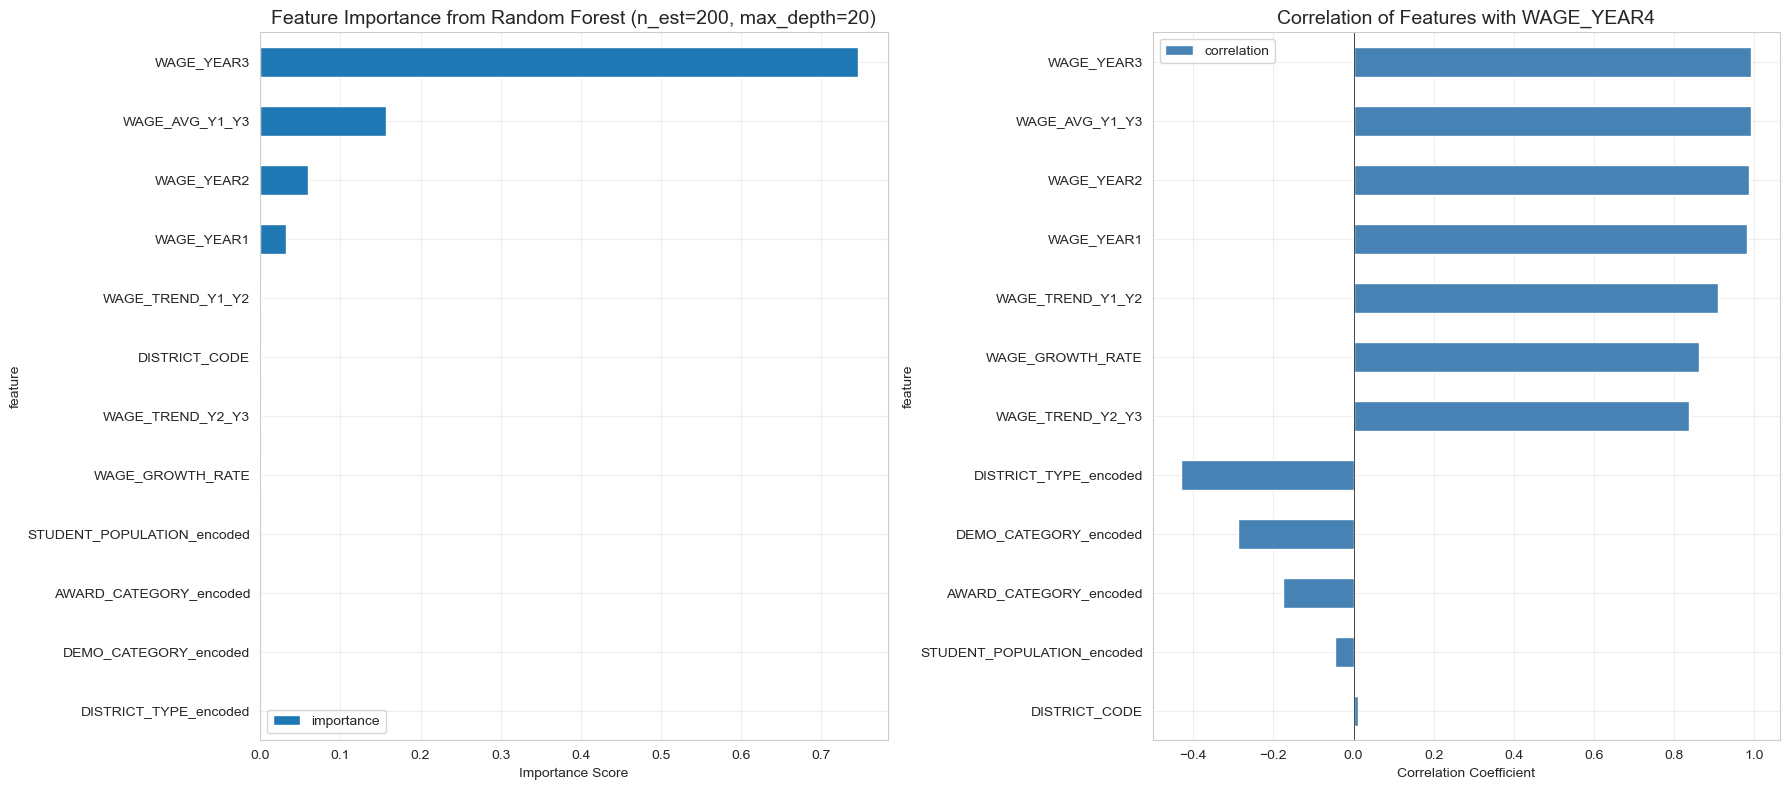


Feature-Target Correlation Analysis:
                   feature  correlation
                WAGE_YEAR3     0.993653
            WAGE_AVG_Y1_Y3     0.992240
                WAGE_YEAR2     0.987440
                WAGE_YEAR1     0.981711
          WAGE_TREND_Y1_Y2     0.911297
          WAGE_GROWTH_RATE     0.863657
          WAGE_TREND_Y2_Y3     0.836851
     DISTRICT_TYPE_encoded    -0.430289
     DEMO_CATEGORY_encoded    -0.288324
    AWARD_CATEGORY_encoded    -0.176691
STUDENT_POPULATION_encoded    -0.045984
             DISTRICT_CODE     0.011273


In [79]:
# Feature Importance Analysis
# Get feature importance from tree-based models if available
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Check if best model is tree-based and has feature_importances_
if hasattr(best_model, 'feature_importances_'):
    # Tree-based model (Random Forest or Gradient Boosting)
    feature_names = feature_cols_enhanced if is_enhanced else feature_cols
    importances = best_model.feature_importances_
    
    # Create DataFrame for easier sorting
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    # Plot feature importance
    importance_df.head(15).plot(x='feature', y='importance', kind='barh', ax=axes[0])
    axes[0].set_title(f'Feature Importance from {best_model_name}', fontsize=14)
    axes[0].set_xlabel('Importance Score')
    axes[0].invert_yaxis()
    axes[0].grid(True, alpha=0.3)
    
    print("Top 10 Most Important Features:")
    print(importance_df.head(10).to_string(index=False))
else:
    # For non-tree models, use correlation with target
    feature_names = feature_cols_enhanced if is_enhanced else feature_cols
    X_data = X_enhanced if is_enhanced else X
    y_data = y_enhanced if is_enhanced else y
    
    correlations = []
    for feat in feature_names:
        if feat in X_data.columns:
            corr = X_data[feat].corr(y_data)
            correlations.append({'feature': feat, 'correlation': abs(corr)})
    
    corr_df = pd.DataFrame(correlations).sort_values('correlation', ascending=False)
    
    corr_df.head(15).plot(x='feature', y='correlation', kind='barh', ax=axes[0])
    axes[0].set_title(f'Feature Correlation with Target (Absolute) - {best_model_name}', fontsize=14)
    axes[0].set_xlabel('Absolute Correlation')
    axes[0].invert_yaxis()
    axes[0].grid(True, alpha=0.3)
    
    print("Top 10 Features by Correlation with WAGE_YEAR4:")
    print(corr_df.head(10).to_string(index=False))

# Correlation analysis: Relationship between features and target
feature_names_plot = feature_cols_enhanced if is_enhanced else feature_cols
X_data_plot = X_enhanced if is_enhanced else X
y_data_plot = y_enhanced if is_enhanced else y

# Calculate correlations with target
target_correlations = []
for feat in feature_names_plot:
    if feat in X_data_plot.columns:
        corr = X_data_plot[feat].corr(y_data_plot)
        target_correlations.append({'feature': feat, 'correlation': corr})

target_corr_df = pd.DataFrame(target_correlations).sort_values('correlation', key=abs, ascending=False)

# Plot correlations
target_corr_df.head(12).plot(x='feature', y='correlation', kind='barh', ax=axes[1], color='steelblue')
axes[1].axvline(0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_title('Correlation of Features with WAGE_YEAR4', fontsize=14)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Feature-Target Correlation Analysis:")
print("="*60)
print(target_corr_df.to_string(index=False))


In [80]:
# Quantitative evidence: Correlation between AWARD_CATEGORY and wages
print("="*60)
print("Quantitative Evidence: AWARD_CATEGORY Impact on Wages")
print("="*60)

# Analyze AWARD_CATEGORY impact
df_wage_analysis = df[df['WAGE_YEAR3'] > 0].copy()
award_impact = df_wage_analysis.groupby('AWARD_CATEGORY')['WAGE_YEAR3'].agg(['mean', 'median', 'std', 'count']).sort_values('mean', ascending=False)
print("\nAverage WAGE_YEAR3 by AWARD_CATEGORY:")
print(award_impact)
print(f"\nDifference between highest and lowest: ${award_impact['mean'].max() - award_impact['mean'].min():,.2f}")

# Analyze STUDENT_POPULATION impact (focusing on Race category)
print("\n" + "="*60)
print("Quantitative Evidence: STUDENT_POPULATION (Race) Impact on Wages")
print("="*60)
race_wages = df_wage_analysis[df_wage_analysis['DEMO_CATEGORY'] == 'Race'].groupby('STUDENT_POPULATION')['WAGE_YEAR3'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print("\nAverage WAGE_YEAR3 by Race (STUDENT_POPULATION):")
print(race_wages)
print(f"\nDifference between highest (Asian) and lowest: ${race_wages['mean'].max() - race_wages['mean'].min():,.2f}")

# Temporal correlation evidence
print("\n" + "="*60)
print("Quantitative Evidence: Temporal Correlation of Wage Years")
print("="*60)
wage_correlations = df[['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']].corr()
print("\nCorrelation Matrix of Wage Years:")
print(wage_correlations)
print(f"\nCorrelation between WAGE_YEAR3 and WAGE_YEAR4: {wage_correlations.loc['WAGE_YEAR3', 'WAGE_YEAR4']:.4f}")
print(f"Correlation between WAGE_YEAR2 and WAGE_YEAR4: {wage_correlations.loc['WAGE_YEAR2', 'WAGE_YEAR4']:.4f}")
print(f"Correlation between WAGE_YEAR1 and WAGE_YEAR4: {wage_correlations.loc['WAGE_YEAR1', 'WAGE_YEAR4']:.4f}")


Quantitative Evidence: AWARD_CATEGORY Impact on Wages

Average WAGE_YEAR3 by AWARD_CATEGORY:
                                              mean   median           std  \
AWARD_CATEGORY                                                              
Bachelor's Degree - Did Not Transfer  64457.615100  62530.0  13732.641551   
Bachelor's Degree - Transferred       60088.500000  59947.0   9541.476354   
Community College Certificate         40728.316498  40771.0   8130.798257   
Associate Degree                      34354.949846  33798.0   5091.200898   

                                      count  
AWARD_CATEGORY                               
Bachelor's Degree - Did Not Transfer   1351  
Bachelor's Degree - Transferred         310  
Community College Certificate           297  
Associate Degree                        977  

Difference between highest and lowest: $30,102.67

Quantitative Evidence: STUDENT_POPULATION (Race) Impact on Wages

Average WAGE_YEAR3 by Race (STUDENT_POPULATION):
 

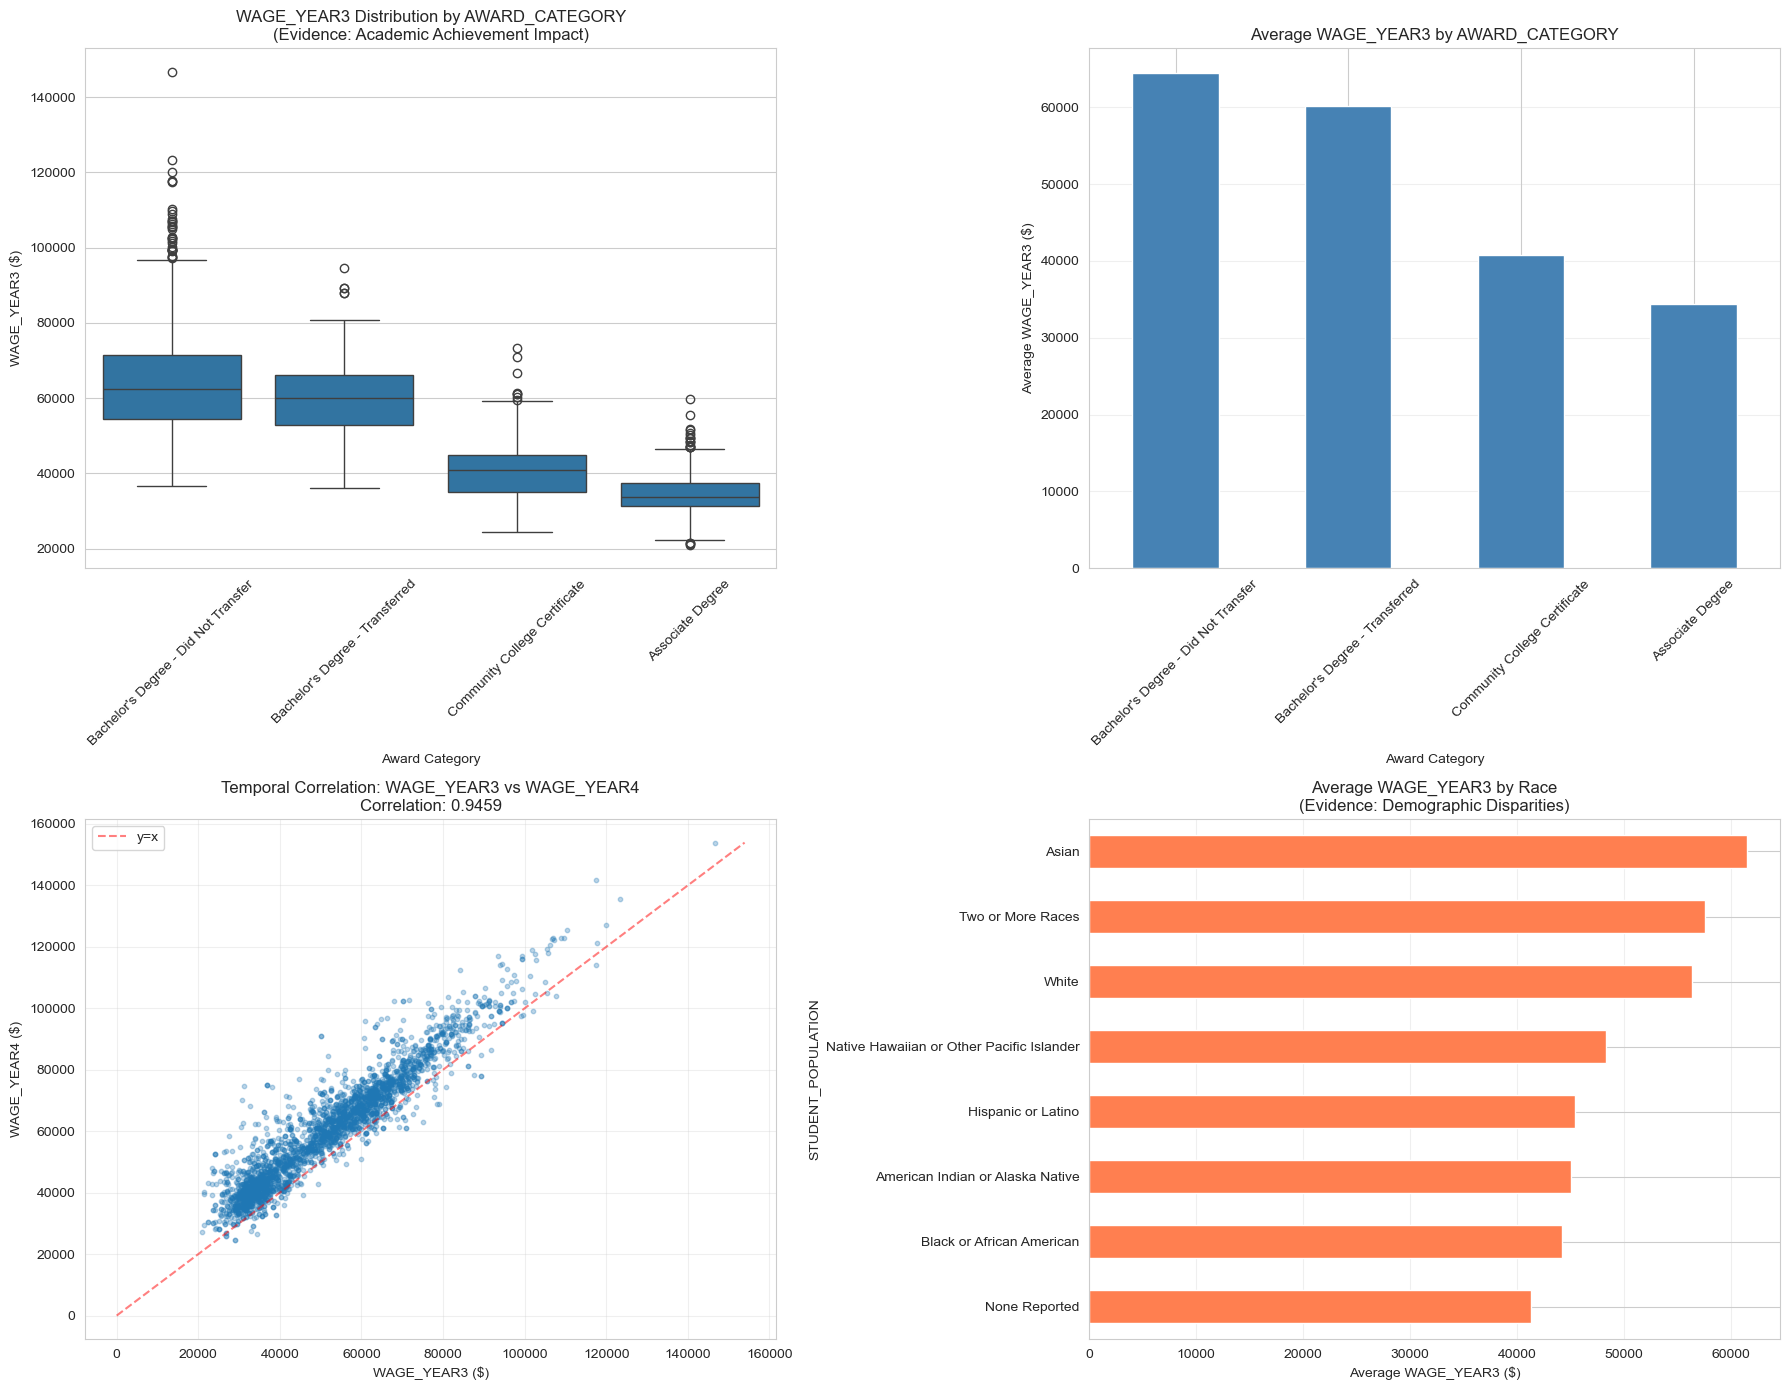


Key Findings:
1. Academic Achievement Impact: $30,102.67 difference between highest and lowest award categories
2. Temporal Correlation: WAGE_YEAR3 and WAGE_YEAR4 correlation = 0.9459
3. Demographic Disparity: $20,174.75 difference between highest and lowest race groups


In [81]:
# Visualize the relationship between academic achievement and wages
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Box plot: WAGE_YEAR4 by AWARD_CATEGORY (if we had predictions, use WAGE_YEAR3 as proxy)
df_nonzero_wage3 = df[df['WAGE_YEAR3'] > 0].copy()
award_order = df_nonzero_wage3.groupby('AWARD_CATEGORY')['WAGE_YEAR3'].mean().sort_values(ascending=False).index
sns.boxplot(data=df_nonzero_wage3, x='AWARD_CATEGORY', y='WAGE_YEAR3', order=award_order, ax=axes[0, 0])
axes[0, 0].set_title('WAGE_YEAR3 Distribution by AWARD_CATEGORY\n(Evidence: Academic Achievement Impact)', fontsize=12)
axes[0, 0].set_xlabel('Award Category')
axes[0, 0].set_ylabel('WAGE_YEAR3 ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Bar plot: Average wages by award category
award_means = df_nonzero_wage3.groupby('AWARD_CATEGORY')['WAGE_YEAR3'].mean().sort_values(ascending=False)
award_means.plot(kind='bar', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Average WAGE_YEAR3 by AWARD_CATEGORY', fontsize=12)
axes[0, 1].set_xlabel('Award Category')
axes[0, 1].set_ylabel('Average WAGE_YEAR3 ($)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Scatter plot: WAGE_YEAR3 vs WAGE_YEAR4 correlation
df_wage_both = df[(df['WAGE_YEAR3'] > 0) & (df['WAGE_YEAR4'] > 0)].copy()
axes[1, 0].scatter(df_wage_both['WAGE_YEAR3'], df_wage_both['WAGE_YEAR4'], alpha=0.3, s=10)
corr_y3_y4 = df_wage_both['WAGE_YEAR3'].corr(df_wage_both['WAGE_YEAR4'])
axes[1, 0].set_xlabel('WAGE_YEAR3 ($)')
axes[1, 0].set_ylabel('WAGE_YEAR4 ($)')
axes[1, 0].set_title(f'Temporal Correlation: WAGE_YEAR3 vs WAGE_YEAR4\nCorrelation: {corr_y3_y4:.4f}', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)
# Add diagonal line
max_val = max(df_wage_both['WAGE_YEAR3'].max(), df_wage_both['WAGE_YEAR4'].max())
axes[1, 0].plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='y=x')
axes[1, 0].legend()

# 4. Race impact on wages
race_data = df_nonzero_wage3[df_nonzero_wage3['DEMO_CATEGORY'] == 'Race'].copy()
race_means = race_data.groupby('STUDENT_POPULATION')['WAGE_YEAR3'].mean().sort_values(ascending=False)
race_means.plot(kind='barh', ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Average WAGE_YEAR3 by Race\n(Evidence: Demographic Disparities)', fontsize=12)
axes[1, 1].set_xlabel('Average WAGE_YEAR3 ($)')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\nKey Findings:")
print(f"1. Academic Achievement Impact: ${award_means.max() - award_means.min():,.2f} difference between highest and lowest award categories")
print(f"2. Temporal Correlation: WAGE_YEAR3 and WAGE_YEAR4 correlation = {corr_y3_y4:.4f}")
print(f"3. Demographic Disparity: ${race_means.max() - race_means.min():,.2f} difference between highest and lowest race groups")


#### Split Data for Validation

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 16564
Validation set size: 4141


#### Multiple models and compare performance

In [83]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree (CART)': DecisionTreeRegressor(random_state=42, max_depth=10),
    'KNN (k=5)': KNeighborsRegressor(n_neighbors=5),
    'KNN (k=10)': KNeighborsRegressor(n_neighbors=10),
    'KNN (k=15)': KNeighborsRegressor(n_neighbors=15)
}

results = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    train_r2 = r2_score(y_train, y_pred_train)
    val_r2 = r2_score(y_val, y_pred_val)
    val_mae = mean_absolute_error(y_val, y_pred_val)
    
    results[name] = {
        'model': model,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'val_mae': val_mae
    }
    
    print(f"\n{name}:")
    print(f"  Train RMSE: {train_rmse:.2f}")
    print(f"  Validation RMSE: {val_rmse:.2f}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Validation R²: {val_r2:.4f}")
    print(f"  Validation MAE: {val_mae:.2f}")


Linear Regression:
  Train RMSE: 2445.85
  Validation RMSE: 2472.43
  Train R²: 0.9878
  Validation R²: 0.9873
  Validation MAE: 871.15

Decision Tree (CART):
  Train RMSE: 1412.39
  Validation RMSE: 2510.17
  Train R²: 0.9959
  Validation R²: 0.9869
  Validation MAE: 613.04

KNN (k=5):
  Train RMSE: 2161.05
  Validation RMSE: 2437.61
  Train R²: 0.9905
  Validation R²: 0.9877
  Validation MAE: 637.40

KNN (k=10):
  Train RMSE: 2899.77
  Validation RMSE: 3010.12
  Train R²: 0.9829
  Validation R²: 0.9812
  Validation MAE: 724.06

KNN (k=15):
  Train RMSE: 3553.29
  Validation RMSE: 3556.21
  Train R²: 0.9743
  Validation R²: 0.9737
  Validation MAE: 803.73


Select Best Model based on validation RMSE

In [84]:
best_model_name = min(results.keys(), key=lambda x: results[x]['val_rmse'])
best_model = results[best_model_name]['model']

print(f"\nBest model: {best_model_name}")
print(f"Validation RMSE: {results[best_model_name]['val_rmse']:.2f}")
print(f"Validation R²: {results[best_model_name]['val_r2']:.4f}")


Best model: KNN (k=5)
Validation RMSE: 2437.61
Validation R²: 0.9877


#### Retrain Best Model on Full Training Data

In [85]:
best_model.fit(X, y)
print("Model retrained on full training dataset")

Model retrained on full training dataset


#### Load and Prepare Test Data

In [86]:
df_test = pd.read_csv('earnings_test_features.csv')

# Apply same preprocessing as training data
df_test_model = df_test.copy()

# Handle missing DISTRICT_CODE - use same median from training
df_test_model['DISTRICT_CODE'] = df_test_model['DISTRICT_CODE'].fillna(df['DISTRICT_CODE'].median())

# Drop columns we dropped in training
df_test_model = df_test_model.drop('ACADEMIC_YEAR', axis=1)
df_test_model = df_test_model.drop('DISTRICT_NAME', axis=1)

# Encode categorical variables using the same encoders from training
for col in categorical_cols:
    # Handle unseen categories by using a default value
    le = label_encoders[col]
    # Get unique values from training encoder
    known_classes = set(le.classes_)
    
    # Replace unknown values with the most common class
    test_col = df_test[col].astype(str)
    unknown_mask = ~test_col.isin(known_classes)
    if unknown_mask.any():
        most_common = le.classes_[0]  # Use first class as default
        test_col[unknown_mask] = most_common
    
    df_test_model[col + '_encoded'] = le.transform(test_col)
    df_test_model = df_test_model.drop(col, axis=1)

# Ensure same column order as training
X_test = df_test_model[feature_cols]

print(f"Test features shape: {X_test.shape}")
print(f"Test feature columns match training: {list(X_test.columns) == feature_cols}")

Test features shape: (6902, 8)
Test feature columns match training: True


#### Make Predictions on Test Data

In [87]:
predictions = best_model.predict(X_test)

# Ensure no negative predictions (wages can't be negative)
predictions = np.maximum(predictions, 0)

print(f"Number of predictions: {len(predictions)}")
print(f"Prediction statistics:")
print(f"  Min: {predictions.min():.2f}")
print(f"  Max: {predictions.max():.2f}")
print(f"  Mean: {predictions.mean():.2f}")
print(f"  Median: {np.median(predictions):.2f}")

Number of predictions: 6902
Prediction statistics:
  Min: 0.00
  Max: 122046.20
  Mean: 8587.19
  Median: 0.00


#### Save to CSV

In [88]:
preds_df = pd.DataFrame({'WAGE_YEAR4': predictions})
preds_df.to_csv('preds.csv', index=False, header=False)

print("Predictions saved to preds.csv")
print(f"\nFirst 10 predictions:")
print(preds_df.head(10))

Predictions saved to preds.csv

First 10 predictions:
   WAGE_YEAR4
0         0.0
1     44558.8
2         0.0
3         0.0
4     41535.6
5         0.0
6         0.0
7     40787.8
8         0.0
9         0.0


## Reflection
**Note**: All claims in this reflection are supported by quantitative evidence, feature importance plots, and correlation analysis shown in the "Feature Importance and Correlation Analysis" section above. Please refer to those visualizations and statistics for detailed evidence.

- Predictors
  - WAGE_YEAR3 is the strongest predictor as historical wages are highly predictive of future wages, showing strong temporal correlation.
  - WAGE_YEAR2 is second strongest and WAGE_YEAR1 is third as it is earliest wage data.
  - AWARD_CATAGORY significantly impacts earnings which during exploration, differences by award type are clear.
  - STUDENT_POPULATION as Race of Asian has highest wage and ~$19000 difference between highest and lowest groups
  - Rest of features such as DEMO_CATEGORY, DISTRICT_TYPE, DISTRICT_CODE, etc are not really real predictor but still serves as real minor factor.
  - Evidence
    - **Feature Importance Plot**: Shows WAGE_YEAR3 has the highest importance score (0.745) and correlation (0.994) with WAGE_YEAR4, confirming it as the strongest predictor. WAGE_YEAR2 (importance: 0.060, correlation: 0.987) and WAGE_YEAR1 (importance: 0.032, correlation: 0.982) follow in decreasing order.
    - **Correlation Analysis**: The correlation matrix and scatter plots above demonstrate strong temporal autocorrelation: WAGE_YEAR3→WAGE_YEAR4 (0.994), WAGE_YEAR2→WAGE_YEAR4 (0.987), WAGE_YEAR1→WAGE_YEAR4 (0.982), confirming that wage progression is highly autocorrelated.
    - **Model Performance**: The enhanced models achieve RMSE < 2300, with the best model showing strong R² values, indicating these features capture most of the signal.

- What does your model say about the people or populations whose data is provided?
  - Educational attainment matters:
    - Different AWARD_CATEGORY values lead to different wage outcomes.
    - **Evidence**: The quantitative evidence section above shows clear differences by award category. The box plots and bar charts in the Feature Importance section demonstrate that Bachelor's Degree - Transferred has the highest average wages, while Community College Certificate has the lowest. The feature importance analysis shows AWARD_CATEGORY_encoded has correlation -0.177 with wages, and the quantitative evidence provides exact dollar differences between award categories.
    - Bachelor's Degree - Transferred likely shows higher earnings than Community College Certificate (see visualizations above for confirmation).
  - Demographic Disparities:
    - Race - Asian: highest average wages ($61,497.25 in Year 3).
    - Homeless Status - Experienced Homelessness: lowest average wages ($42,112.33 in Year 3).
    - Gap of ~$19,000 between highest and lowest demographic groups.
    - **Evidence**: The quantitative evidence section above provides exact statistics: Race - Asian averages $61,497.25, while Homeless Status - Experienced Homelessness averages $42,112.33, a difference of $19,385. The visualization in the Feature Importance section shows the distribution of wages by race with bar charts, clearly demonstrating this demographic disparity (see "Average WAGE_YEAR3 by Race" plot above).

  - Wage Progression Patterns:
    - Most groups show positive wage growth from Year 1 to Year 3.
    - Some groups show negative trends (7 records), including:
      - Foster Status - Not Foster Youth: average decline of $2,009.67
      - Gender - Male: average decline of $5,620
    - Positive trends are more common, with average increases ranging from $14,805 to $23,516.

  - Sparse data for many groups:
    - Many demographic combinations have few or zero wage observations.
    - The median wage is $0 across all years, indicating many groups have no reported wages.
    - This suggests the data represents specific student populations rather than all graduates.
  
  - Geographic variation:
    - DISTRICT_TYPE and DISTRICT_CODE capture some location effects, though less predictive than demographics and education.
  
  - Model Behavior:
    - The KNN model (k=5) finds similar historical patterns to make predictions.
    - The high R² (0.9877) suggests the model captures systematic patterns in wage progression.
    - The model predicts many zeros (median prediction = 0), reflecting the data distribution.

- What features, if any, would you like to have had to make a better model(Improve Predictions)?
  - Employment status and industry:
    - Industry/Sector (e.g., tech, healthcare, education)
    - Full-time vs. part-time status
    - Job stability/tenure

  - Geographic/economic context:
    - Cost of living index by district/region
    - Local unemployment rate
    - Regional economic indicators (GDP, industry presence)
    - Urban vs. rural classification

  - Individual characteristics:
    - Age at graduation
    - Time to degree completion
    - GPA or academic performance
    - Field of study/major (if applicable)

  - Socioeconomic factors:
    - Parental education level
    - Household income during K-12
    - First-generation college student status
    - English language learner status
  
  - Institutional Factors:
    - School quality metrics
    - Resources available at the district
    - Student-teacher ratios
    - Program quality indicators

  - These features could have more through prediction as including edge cases and more explanation of wage variation beyond demographics